# DATASETS

In [1]:
import pandas as pd

#shared_drive_path = '/content/drive/Shared drives/analitica_visual_project/datasets/'
shared_drive_path = 'datasets/'

df_players = pd.read_csv(shared_drive_path + 'euroleague_players.csv')
df_box_score = pd.read_csv(shared_drive_path + 'euroleague_box_score.csv')
df_teams = pd.read_csv(shared_drive_path + 'euroleague_teams.csv')
df_points = pd.read_csv(shared_drive_path + 'euroleague_points.csv')
df_header = pd.read_csv(shared_drive_path + 'euroleague_header.csv')

df_box_score_eurocup = pd.read_csv(shared_drive_path + 'eurocup_box_score.csv')

In [2]:
df_team_stats_each_game = df_box_score[df_box_score['dorsal'] == 'TOTAL']

# Add the points_received column
df_team_stats_each_game['points_received'] = df_team_stats_each_game.groupby('game_id')['points'].shift(-1)

# To ensure the last row in each game_id group gets its corresponding points
df_team_stats_each_game['points_received'] = df_team_stats_each_game['points_received'].fillna(df_team_stats_each_game.groupby('game_id')['points'].shift(1))

# Adding column WIN
df_team_stats_each_game['win'] = (df_team_stats_each_game['points'] > df_team_stats_each_game['points_received']).astype(int)


# Add 'points_received_per_game' to df_teams
# Filter only team stats from df_team_stats_each_game
team_stats = df_team_stats_each_game[['team_id', 'season_code', 'points_received']]

# Group by team and season to calculate the mean points received
points_received_avg = team_stats.groupby(['team_id', 'season_code'])['points_received'].mean().reset_index()
points_received_avg.rename(columns={'points_received': 'points_received_per_game'}, inplace=True)

# Merge with df_teams
df_teams = pd.merge(df_teams, points_received_avg, on=['team_id', 'season_code'], how='left')

# Step 1.1: Drop unnecessary columns
columns_to_drop = ['game_player_id', 'player_id', 'is_starter', 'is_playing', 'dorsal', 'player', 'minutes']
df_team_stats_each_game = df_team_stats_each_game.drop(columns=columns_to_drop)

# Step 1.3: Combine rows into single rows representing matchups
# Split rows into two groups (team A and team B stats)
team_a_stats = df_team_stats_each_game[df_team_stats_each_game['game_id'].duplicated(keep='first')]
team_b_stats = df_team_stats_each_game[df_team_stats_each_game['game_id'].duplicated(keep='last')]

# Merge team A and team B stats into a single row per game
merged_df_team_stats_each_game = pd.merge(team_a_stats, team_b_stats, on='game_id', suffixes=('_a', '_b'))

# Optional: Remove duplicate columns and reorder if necessary
merged_df_team_stats_each_game = merged_df_team_stats_each_game.drop(columns=['game_b', 'round_b', 'phase_b'])
merged_df_team_stats_each_game.rename(columns={'season_code_a': 'season_code'}, inplace=True)
merged_df_team_stats_each_game.rename(columns={'game_a': 'game'}, inplace=True)
merged_df_team_stats_each_game.rename(columns={'round_a': 'round'}, inplace=True)
merged_df_team_stats_each_game.rename(columns={'phase_a': 'phase'}, inplace=True)

C:\Users\ffuen\AppData\Local\Temp\ipykernel_22096\832884053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_stats_each_game['points_received'] = df_team_stats_each_game.groupby('game_id')['points'].shift(-1)
C:\Users\ffuen\AppData\Local\Temp\ipykernel_22096\832884053.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_stats_each_game['points_received'] = df_team_stats_each_game['points_received'].fillna(df_team_stats_each_game.groupby('game_id')['points'].shift(1))
C:\Users\ffuen\AppData

In [3]:
merged_df_team_stats_each_game

,game_id,game,round,phase,season_code,team_id_a,points_a,two_points_made_a,two_points_attempted_a,three_points_made_a,...,steals_b,turnovers_b,blocks_favour_b,blocks_against_b,fouls_committed_b,fouls_received_b,valuation_b,plus_minus_b,points_received_b,win_b
0,E2007_191,BAR-ROM,17,TOP 16,E2007,ROM,57,18,43,5,...,10,17,7,5,16,25,111,0,57.0,1
1,E2007_051,LJU-BAS,5,REGULAR SEASON,E2007,BAS,92,27,37,6,...,8,13,1,1,25,24,62,0,92.0,0
2,E2007_228,SIE-TEL,24,FINAL FOUR,E2007,TEL,92,20,38,11,...,10,7,1,4,25,26,80,0,92.0,0
3,E2007_172,ARI-ULK,15,TOP SIXTEEN,E2007,ULK,96,27,42,8,...,6,10,4,8,24,23,84,0,96.0,0
4,E2007_129,ULK-ROA,11,REGULAR SEASON,E2007,ROA,68,18,37,7,...,10,21,3,1,13,13,89,0,68.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,E2024_072,VIR-TEL,8,REGULAR SEASON,E2024,TEL,77,25,52,7,...,8,11,3,2,17,20,101,0,77.0,1
4375,E2024_064,IST-MCO,8,REGULAR SEASON,E2024,MCO,81,19,40,9,...,6,18,4,3,22,20,75,0,81.0,0
4376,E2024_025,BAR-MCO,3,REGULAR SEASON,E2024,MCO,71,21,43,5,...,4,16,3,1,19,19,101,0,71.0,1
4377,E2024_069,ASV-ULK,8,REGULAR SEASON,E2024,ULK,77,22,37,6,...,8,11,1,3,19,25,78,0,77.0,0


In [4]:
df_team_stats_each_game_eurocup = df_box_score_eurocup[df_box_score_eurocup['dorsal'] == 'TOTAL']

# Add the points_received column
df_team_stats_each_game_eurocup['points_received'] = df_team_stats_each_game_eurocup.groupby('game_id')['points'].shift(-1)

# To ensure the last row in each game_id group gets its corresponding points
df_team_stats_each_game_eurocup['points_received'] = df_team_stats_each_game_eurocup['points_received'].fillna(df_team_stats_each_game_eurocup.groupby('game_id')['points'].shift(1))

# Adding column WIN
df_team_stats_each_game_eurocup['win'] = (df_team_stats_each_game_eurocup['points'] > df_team_stats_each_game_eurocup['points_received']).astype(int)

# Step 1.1: Drop unnecessary columns
columns_to_drop = ['game_player_id', 'player_id', 'is_starter', 'is_playing', 'dorsal', 'player', 'minutes']
df_team_stats_each_game_eurocup = df_team_stats_each_game_eurocup.drop(columns=columns_to_drop)

# Step 1.3: Combine rows into single rows representing matchups
# Split rows into two groups (team A and team B stats)
team_a_stats_eurocup = df_team_stats_each_game_eurocup[df_team_stats_each_game_eurocup['game_id'].duplicated(keep='first')]
team_b_stats_eurocup = df_team_stats_each_game_eurocup[df_team_stats_each_game_eurocup['game_id'].duplicated(keep='last')]

# Merge team A and team B stats into a single row per game
merged_df_team_stats_each_game_eurocup = pd.merge(team_a_stats_eurocup, team_b_stats_eurocup, on='game_id', suffixes=('_a', '_b'))

# Optional: Remove duplicate columns and reorder if necessary
merged_df_team_stats_each_game_eurocup = merged_df_team_stats_each_game_eurocup.drop(columns=['game_b', 'round_b', 'phase_b'])
merged_df_team_stats_each_game_eurocup.rename(columns={'season_code_a': 'season_code'}, inplace=True)
merged_df_team_stats_each_game_eurocup.rename(columns={'game_a': 'game'}, inplace=True)
merged_df_team_stats_each_game_eurocup.rename(columns={'round_a': 'round'}, inplace=True)
merged_df_team_stats_each_game_eurocup.rename(columns={'phase_a': 'phase'}, inplace=True)

C:\Users\ffuen\AppData\Local\Temp\ipykernel_22096\4235222281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_stats_each_game_eurocup['points_received'] = df_team_stats_each_game_eurocup.groupby('game_id')['points'].shift(-1)
C:\Users\ffuen\AppData\Local\Temp\ipykernel_22096\4235222281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_stats_each_game_eurocup['points_received'] = df_team_stats_each_game_eurocup['points_received'].fillna(df_team_stats_each_game_eurocup.groupby('game_id')[

In [5]:
# Concatenating the DataFrames
merged_df_team_stats_each_game_all_games = pd.concat([merged_df_team_stats_each_game_eurocup, merged_df_team_stats_each_game], axis=0,  ignore_index=True)

# Check the result
merged_df_team_stats_each_game_all_games


,game_id,game,round,phase,season_code,team_id_a,points_a,two_points_made_a,two_points_attempted_a,three_points_made_a,...,steals_b,turnovers_b,blocks_favour_b,blocks_against_b,fouls_committed_b,fouls_received_b,valuation_b,plus_minus_b,points_received_b,win_b
0,U2007_187,JER-DEN,7,REGULAR SEASON,U2007,DEN,97,25,44,13,...,15,11,2,2,18,19,141,0,97.0,1
1,U2007_293,TTK-UNK,12,LAST 32,U2007,UNK,93,26,44,9,...,5,8,3,1,20,17,94,0,93.0,1
2,U2007_037,NAN-PAM,2,REGULAR SEASON,U2007,PAM,86,23,48,8,...,6,15,3,6,21,19,87,0,86.0,0
3,U2007_119,NAN-WLO,5,REGULAR SEASON,U2007,WLO,66,17,37,6,...,9,20,5,0,21,29,121,0,66.0,1
4,U2007_101,CAN-NIO,4,REGULAR SEASON,U2007,NIO,73,24,47,4,...,12,16,4,1,21,27,94,0,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,E2024_072,VIR-TEL,8,REGULAR SEASON,E2024,TEL,77,25,52,7,...,8,11,3,2,17,20,101,0,77.0,1
7963,E2024_064,IST-MCO,8,REGULAR SEASON,E2024,MCO,81,19,40,9,...,6,18,4,3,22,20,75,0,81.0,0
7964,E2024_025,BAR-MCO,3,REGULAR SEASON,E2024,MCO,71,21,43,5,...,4,16,3,1,19,19,101,0,71.0,1
7965,E2024_069,ASV-ULK,8,REGULAR SEASON,E2024,ULK,77,22,37,6,...,8,11,1,3,19,25,78,0,77.0,0


In [6]:
df_teams

,season_team_id,season_code,team_id,games_played,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,...,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game,points_received_per_game
0,E2007_ARI,E2007,ARI,20.0,805.0,1502,381,773,142,395,...,30.10,10.60,9.15,13.35,2.60,3.05,21.05,22.00,73.75,78.350000
1,E2007_BAM,E2007,BAM,14.0,559.1,879,210,421,100,292,...,27.57,11.50,5.71,15.71,1.79,2.57,22.14,19.36,53.29,74.285714
2,E2007_BAR,E2007,BAR,23.0,919.8,1708,483,895,150,514,...,33.87,14.26,9.39,12.74,3.78,2.87,19.65,19.52,81.57,70.304348
3,E2007_BAS,E2007,BAS,25.0,1005.0,2066,528,937,204,534,...,32.32,13.32,7.96,12.64,2.60,2.68,20.20,21.44,89.16,76.320000
4,E2007_CIB,E2007,CIB,14.0,560.0,1080,281,524,106,295,...,27.07,10.00,9.29,14.43,1.43,3.50,23.29,19.71,68.29,84.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,E2024_RED,E2024,RED,8.0,325.0,653,153,285,80,198,...,32.88,18.12,5.50,13.00,1.75,2.88,21.50,19.12,85.88,79.500000
368,E2024_TEL,E2024,TEL,8.0,320.0,641,174,339,58,159,...,34.62,16.25,5.25,12.12,1.50,2.88,19.38,21.12,86.62,84.125000
369,E2024_ULK,E2024,ULK,8.0,320.0,626,127,271,89,229,...,37.38,17.38,6.00,13.25,2.62,2.88,21.50,18.75,83.75,75.500000
370,E2024_VIR,E2024,VIR,8.0,320.0,633,156,292,60,182,...,30.75,17.12,5.25,12.38,2.62,2.38,21.62,21.50,84.25,83.375000


In [7]:
team_mappings = {
    'OLYMPIACOS': ['OLYMPIACOS PIRAEUS B.C.', 'OLYMPIACOS PIRAEUS', 'OLYMPIACOS PIRAEUS BC', 'OLYMPIACOS'],
    'BARCELONA': ['AXA FC BARCELONA', 'REGAL FC BARCELONA', 'REGAL FC BARCELONA ', 'FC BARCELONA REGAL',
                  'FC BARCELONA', 'FC BARCELONA LASSA'],
    'REAL MADRID': ['REAL MADRID'],
    'CSKA MOSCOW': ['CSKA MOSCOW'],
    'ZALGIRIS': ['ZALGIRIS', 'ZALGIRIS KAUNAS'],
    'PANATHINAIKOS': ['PANATHINAIKOS', 'PANATHINAIKOS BSA ATHENS', 'PANATHINAIKOS ATHENS',
                      'PANATHINAIKOS SUPERFOODS ATHENS', 'PANATHINAIKOS OPAP ATHENS', 'PANATHINAIKOS AKTOR ATHENS'],
    'PARTIZAN': ['PARTIZAN BC', 'PARTIZAN', 'PARTIZAN IGOKEA', 'PARTIZAN MT:S', 'PARTIZAN MT:S BELGRADE',
                 'PARTIZAN NIS BELGRADE', 'PARTIZAN MOZZART BET BELGRADE'],
    'MILAN': ['MILANO', 'ARMANI JEANS MILANO', 'EA7 EMPORIO ARMANI MILANO', 'AX ARMANI EXCHANGE OLIMPIA MILAN',
              'AX ARMANI EXCHANGE MILAN'],
    'FENERBAHCE': ['FENERBAHCE ULKER', 'FENERBAHCE ULKER ISTANBUL', 'FENERBAHCE ISTANBUL',
                   'FENERBAHCE BEKO ISTANBUL', 'FB DOGUS'],
    'MACCABI TEL AVIV': ['MACCABI TEL AVIV', 'MACCABI ELITE TEL AVIV', 'MACCABI ELECTRA TEL AVIV',
                         'MACCABI FOX TEL AVIV', 'MACCABI PLAYTIKA TEL AVIV'],
    'EFES': ['EFES PILSEN ISTANBUL', 'ANADOLU EFES ISTANBUL'],
    'BASKONIA': ['CAJA LABORAL BASKONIA', 'CAJA LABORAL', 'LABORAL KUTXA VITORIA',
                 'LABORAL KUTXA VITORIA GASTEIZ', 'KIROLBET BASKONIA VITORIA GASTEIZ',
                 'KIROLBET BASKONIA VITORIA-GASTEIZ', 'TD SYSTEMS BASKONIA VITORIA-GASTEIZ',
                 'BITCI BASKONIA VITORIA-GASTEIZ', 'BASKONIA VITORIA-GASTEIZ',
                 'CAZOO BASKONIA VITORIA-GASTEIZ'],
    'VALENCIA': ['POWER ELECTRONICS VALENCIA', 'VALENCIA BASKET'],
    'UNICAJA': ['UNICAJA', 'UNICAJA MALAGA'],
    'ALBA BERLIN': ['ALBA BERLIN'],
    'BAYERN MUNICH': ['FC BAYERN MUNICH'],
    'BROSE BAMBERG': ['BROSE BASKETS', 'BASKETS BAMBERG', 'BROSE BASKETS BAMBERG', 'BROSE BAMBERG'],
    'GALATASARAY': ['GALATASARAY MEDICAL PARK', 'GALATASARAY LIV HOSPITAL ISTANBUL', 'GALATASARAY ODEABANK ISTANBUL'],
    'CRVENA ZVEZDA': ['CRVENA ZVEZDA TELEKOM BELGRADE', 'CRVENA ZVEZDA MTS BELGRADE',
                      'CRVENA ZVEZDA MERIDIANBET BELGRADE'],
    'BILBAO': ['BILBAO BASKET', 'BIZKAIA BILBAO BASKET', 'GESCRAP BB'],
    'VIRTUS BOLOGNA': ['VIRTUS VIDIVICI BOLOGNA', 'VIRTUS SEGAFREDO BOLOGNA'],
    'DARUSSAFAKA': ['DARUSSAFAKA DOGUS ISTANBUL', 'DARUSSAFAKA TEKFEN ISTANBUL'],
    'BUDUCNOST': ['BUDUCNOST VOLI PODGORICA'],
    'MONACO': ['AS MONACO'],
    'KHIMKI': ['BC KHIMKI', 'KHIMKI MOSCOW REGION', 'BC KHIMKI MOSCOW REGION'],
    'LIETUVOS RYTAS': ['LIETUVOS RYTAS', 'LIETUVOS RYTAS VILNIUS'],
    'CIBONA': ['KK CIBONA', 'CIBONA'],
    'UNION OLIMPIJA': ['UNION OLIMPIJA', 'UNION OLIMPIJA LJUBLJANA'],
    'PROKOM': ['PROKOM TREFL SOPOT', 'ASSECO PROKOM SOPOT', 'ASSECO PROKOM GDYNIA', 'ASSECO PROKOM'],
    'VIRTUS ROMA': ['LOTTOMATICA ROMA', 'VIRTUS ROMA'],
    'ASVEL': ['ASVEL LYON', 'LDLC ASVEL VILLEURBANNE'],
    'NANTERRE': ['JSF NANTERRE'],
    'STRASBOURG': ['STRASBOURG'],
    'LIMOGES': ['LIMOGES CSP'],
    'CHOLET': ['CHOLET BASKET'],
    'CHALON': ['ELAN CHALON-SUR-SAONE'],
    'PARIS BASKETBALL': ['PARIS BASKETBALL']
}


# Create a reverse lookup dictionary from team_mappings
name_to_normalized = {}
for normalized_name, variations in team_mappings.items():
    for variation in variations:
        name_to_normalized[variation.upper()] = normalized_name

# Function to normalize team names
def normalize_team_name(team_name):
    return name_to_normalized.get(team_name.upper(), team_name)  # Return input if no match

# Apply normalization to 'team_a' and 'team_b' columns
df_header['team_a_'] = df_header['team_a'].apply(normalize_team_name)
df_header['team_b_'] = df_header['team_b'].apply(normalize_team_name)

# Display the updated DataFrame (optional)
df_header.head()


,game_id,game,date,time,round,phase,season_code,score_a,score_b,team_a,...,score_extra_time_1_a,score_extra_time_2_a,score_extra_time_3_a,score_extra_time_4_a,score_extra_time_1_b,score_extra_time_2_b,score_extra_time_3_b,score_extra_time_4_b,team_a_,team_b_
0,E2007_001,OLY-BAS,2007-10-25,20:30:00,1,REGULAR SEASON,E2007,95,90,OLYMPIACOS PIRAEUS B.C.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OLYMPIACOS,BASKONIA
1,E2007_002,VIR-ZAL,2007-10-24,20:30:00,1,REGULAR SEASON,E2007,81,75,VIRTUS VIDIVICI BOLOGNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIRTUS BOLOGNA,ZALGIRIS
2,E2007_003,SOP-CSK,2007-10-22,20:15:00,1,REGULAR SEASON,E2007,69,88,PROKOM TREFL SOPOT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PROKOM,CSKA MOSCOW
3,E2007_004,SIE-LJU,2007-10-24,20:30:00,1,REGULAR SEASON,E2007,80,52,MONTEPASCHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MONTEPASCHI,OLIMPIJA
4,E2007_005,ARI-MAL,2007-10-24,20:45:00,1,REGULAR SEASON,E2007,87,83,ARIS THESSALONIKI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ARIS THESSALONIKI,BALONCESTO MALAGA


In [8]:
# Assume df_teams is your DataFrame and team_mappings has already been defined.

# Create a mapping of team_id to normalized team names
# In this case, manually map 'team_id' keys to their normalized names.
team_id_to_name = {
    'OLY': 'OLYMPIACOS',
    'BAR': 'BARCELONA',
    'MAD': 'REAL MADRID',
    'CSK': 'CSKA MOSCOW',
    'ZAL': 'ZALGIRIS',
    'PAN': 'PANATHINAIKOS',
    'PAR': 'PARTIZAN',
    'MIL': 'MILAN',
    'IST': 'FENERBAHCE',
    'TEL': 'MACCABI TEL AVIV',
    'EFES': 'EFES',
    'BAS': 'BASKONIA',
    'VAL': 'VALENCIA',
    'MAL': 'UNICAJA',
    'BER': 'ALBA BERLIN',
    'MUN': 'BAYERN MUNICH',
    'BAM': 'BROSE BAMBERG',
    'GAL': 'GALATASARAY',
    'RED': 'CRVENA ZVEZDA',
    'BIL': 'BILBAO',
    'VIR': 'VIRTUS BOLOGNA',
    'DAR': 'DARUSSAFAKA',
    'BUD': 'BUDUCNOST',
    'MCO': 'MONACO',
    'KHI': 'KHIMKI',
    'LIE': 'LIETUVOS RYTAS',
    'CIB': 'CIBONA',
    'LJU': 'UNION OLIMPIJA',
    'SOP': 'PROKOM',
    'ROM': 'VIRTUS ROMA',
    'ASV': 'ASVEL',
    'NTR': 'NANTERRE',
    'STR': 'STRASBOURG',
    'LMG': 'LIMOGES',
    'CHO': 'CHOLET',
    'CHA': 'CHALON',
    'PRS': 'PARIS BASKETBALL'
}

# Function to map team_id to team_name
def map_team_id_to_name(team_id):
    return team_id_to_name.get(team_id, team_id)  # Return the team_id if no match is found

# Apply the mapping to create the new 'team_name' column
df_teams['team_name'] = df_teams['team_id'].apply(map_team_id_to_name)

# Display the updated DataFrame (optional)
df_teams.head()


,season_team_id,season_code,team_id,games_played,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,...,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game,points_received_per_game,team_name
0,E2007_ARI,E2007,ARI,20.0,805.0,1502,381,773,142,395,...,10.60,9.15,13.35,2.60,3.05,21.05,22.00,73.75,78.350000,ARI
1,E2007_BAM,E2007,BAM,14.0,559.1,879,210,421,100,292,...,11.50,5.71,15.71,1.79,2.57,22.14,19.36,53.29,74.285714,BROSE BAMBERG
2,E2007_BAR,E2007,BAR,23.0,919.8,1708,483,895,150,514,...,14.26,9.39,12.74,3.78,2.87,19.65,19.52,81.57,70.304348,BARCELONA
3,E2007_BAS,E2007,BAS,25.0,1005.0,2066,528,937,204,534,...,13.32,7.96,12.64,2.60,2.68,20.20,21.44,89.16,76.320000,BASKONIA
4,E2007_CIB,E2007,CIB,14.0,560.0,1080,281,524,106,295,...,10.00,9.29,14.43,1.43,3.50,23.29,19.71,68.29,84.857143,CIBONA


In [9]:
df_players.columns

Index(['season_player_id', 'season_code', 'player_id', 'player', 'team_id',
       'games_played', 'games_started', 'minutes', 'points', 'two_points_made',
       'two_points_attempted', 'three_points_made', 'three_points_attempted',
       'free_throws_made', 'free_throws_attempted', 'offensive_rebounds',
       'defensive_rebounds', 'total_rebounds', 'assists', 'steals',
       'turnovers', 'blocks_favour', 'blocks_against', 'fouls_committed',
       'fouls_received', 'valuation', 'plus_minus', 'minutes_per_game',
       'points_per_game', 'two_points_made_per_game',
       'two_points_attempted_per_game', 'two_points_percentage',
       'three_points_made_per_game', 'three_points_attempted_per_game',
       'three_points_percentage', 'free_throws_made_per_game',
       'free_throws_attempted_per_game', 'free_throws_percentage',
       'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'turnove

In [10]:
df_box_score.columns

Index(['game_player_id', 'game_id', 'game', 'round', 'phase', 'season_code',
       'player_id', 'is_starter', 'is_playing', 'team_id', 'dorsal', 'player',
       'minutes', 'points', 'two_points_made', 'two_points_attempted',
       'three_points_made', 'three_points_attempted', 'free_throws_made',
       'free_throws_attempted', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'turnovers', 'blocks_favour',
       'blocks_against', 'fouls_committed', 'fouls_received', 'valuation',
       'plus_minus'],
      dtype='object')

In [11]:
df_teams.columns

Index(['season_team_id', 'season_code', 'team_id', 'games_played', 'minutes',
       'points', 'two_points_made', 'two_points_attempted',
       'three_points_made', 'three_points_attempted', 'free_throws_made',
       'free_throws_attempted', 'offensive_rebounds', 'defensive_rebounds',
       'total_rebounds', 'assists', 'steals', 'turnovers', 'blocks_favour',
       'blocks_against', 'fouls_committed', 'fouls_received', 'valuation',
       'minutes_per_game', 'points_per_game', 'two_points_made_per_game',
       'two_points_attempted_per_game', 'two_points_percentage',
       'three_points_made_per_game', 'three_points_attempted_per_game',
       'three_points_percentage', 'free_throws_made_per_game',
       'free_throws_attempted_per_game', 'free_throws_percentage',
       'offensive_rebounds_per_game', 'defensive_rebounds_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'turnovers_per_game', 'blocks_favour_per_game',
       'blocks_against_

In [12]:
df_points.columns

Index(['game_point_id', 'game_id', 'game', 'round', 'phase', 'season_code',
       'number_of_play', 'team_id', 'player_id', 'player', 'action_id',
       'action', 'points', 'coord_x', 'coord_y', 'zone', 'fastbreak',
       'second_chance', 'points_off_turnover', 'minute', 'console', 'points_a',
       'points_b', 'timestamp'],
      dtype='object')

In [13]:
df_header.columns

Index(['game_id', 'game', 'date', 'time', 'round', 'phase', 'season_code',
       'score_a', 'score_b', 'team_a', 'team_b', 'team_id_a', 'team_id_b',
       'coach_a', 'coach_b', 'game_time', 'remaining_partial_time',
       'referee_1', 'referee_2', 'referee_3', 'stadium', 'capacity', 'w_id',
       'fouls_a', 'fouls_b', 'timeouts_a', 'timeouts_b', 'score_quarter_1_a',
       'score_quarter_2_a', 'score_quarter_3_a', 'score_quarter_4_a',
       'score_quarter_1_b', 'score_quarter_2_b', 'score_quarter_3_b',
       'score_quarter_4_b', 'score_extra_time_1_a', 'score_extra_time_2_a',
       'score_extra_time_3_a', 'score_extra_time_4_a', 'score_extra_time_1_b',
       'score_extra_time_2_b', 'score_extra_time_3_b', 'score_extra_time_4_b',
       'team_a_', 'team_b_'],
      dtype='object')

In [14]:
df_team_stats_each_game.columns

Index(['game_id', 'game', 'round', 'phase', 'season_code', 'team_id', 'points',
       'two_points_made', 'two_points_attempted', 'three_points_made',
       'three_points_attempted', 'free_throws_made', 'free_throws_attempted',
       'offensive_rebounds', 'defensive_rebounds', 'total_rebounds', 'assists',
       'steals', 'turnovers', 'blocks_favour', 'blocks_against',
       'fouls_committed', 'fouls_received', 'valuation', 'plus_minus',
       'points_received', 'win'],
      dtype='object')

In [15]:
merged_df_team_stats_each_game.columns

Index(['game_id', 'game', 'round', 'phase', 'season_code', 'team_id_a',
       'points_a', 'two_points_made_a', 'two_points_attempted_a',
       'three_points_made_a', 'three_points_attempted_a', 'free_throws_made_a',
       'free_throws_attempted_a', 'offensive_rebounds_a',
       'defensive_rebounds_a', 'total_rebounds_a', 'assists_a', 'steals_a',
       'turnovers_a', 'blocks_favour_a', 'blocks_against_a',
       'fouls_committed_a', 'fouls_received_a', 'valuation_a', 'plus_minus_a',
       'points_received_a', 'win_a', 'season_code_b', 'team_id_b', 'points_b',
       'two_points_made_b', 'two_points_attempted_b', 'three_points_made_b',
       'three_points_attempted_b', 'free_throws_made_b',
       'free_throws_attempted_b', 'offensive_rebounds_b',
       'defensive_rebounds_b', 'total_rebounds_b', 'assists_b', 'steals_b',
       'turnovers_b', 'blocks_favour_b', 'blocks_against_b',
       'fouls_committed_b', 'fouls_received_b', 'valuation_b', 'plus_minus_b',
       'points_receiv

# PRIMEROS PLOTS / LINE CHARTS

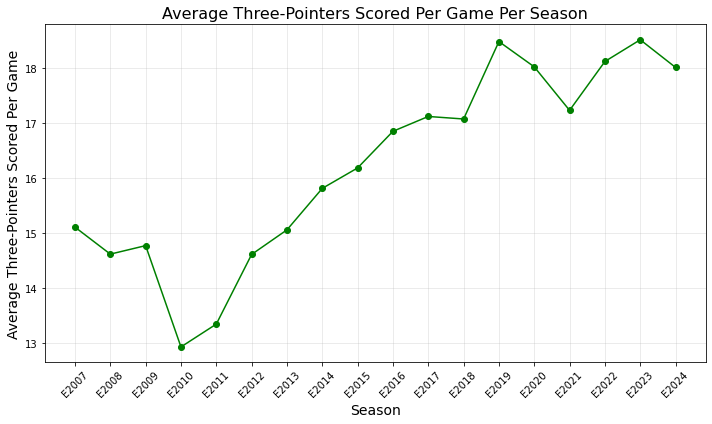

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for three-pointers made
df_three_pointers = df_points[df_points['action_id'] == '3FGM']

# Group by game_id to get the total three-pointers per game
three_pointers_per_game = df_three_pointers.groupby(['game_id', 'season_code'])['action_id'].count().reset_index()
three_pointers_per_game.rename(columns={'action_id': 'three_pointers_per_game'}, inplace=True)

# Group by season_code and calculate the average three-pointers per game
average_three_pointers_by_season = (
    three_pointers_per_game.groupby('season_code')['three_pointers_per_game']
    .mean()
    .reset_index()
)
average_three_pointers_by_season.rename(columns={'three_pointers_per_game': 'average_three_pointers'}, inplace=True)

# Sort by season_code (optional, if not already sorted)
average_three_pointers_by_season = average_three_pointers_by_season.sort_values('season_code')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_three_pointers_by_season['season_code'],
         average_three_pointers_by_season['average_three_pointers'],
         marker='o', color='green')
plt.title('Average Three-Pointers Scored Per Game Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Three-Pointers Scored Per Game', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


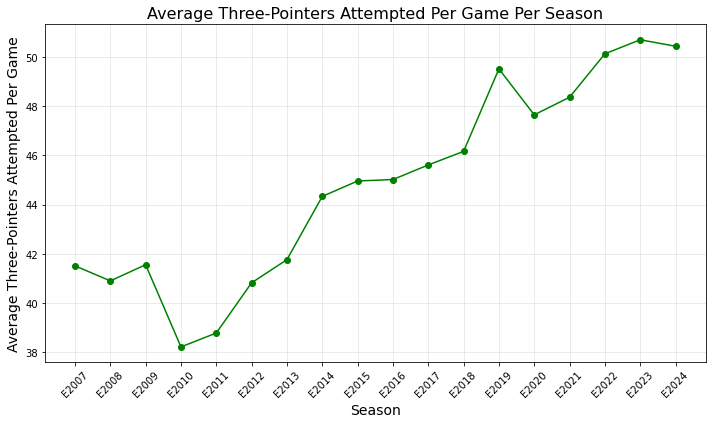

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for three-pointers made
df_three_pointers = df_points[(df_points['action_id'] == '3FGA') | (df_points['action_id'] == '3FGM')]

# Group by game_id to get the total three-pointers per game
three_pointers_per_game = df_three_pointers.groupby(['game_id', 'season_code'])['action_id'].count().reset_index()
three_pointers_per_game.rename(columns={'action_id': 'three_pointers_per_game'}, inplace=True)

# Group by season_code and calculate the average three-pointers per game
average_three_pointers_by_season = (
    three_pointers_per_game.groupby('season_code')['three_pointers_per_game']
    .mean()
    .reset_index()
)
average_three_pointers_by_season.rename(columns={'three_pointers_per_game': 'average_three_pointers'}, inplace=True)

# Sort by season_code (optional, if not already sorted)
average_three_pointers_by_season = average_three_pointers_by_season.sort_values('season_code')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_three_pointers_by_season['season_code'],
         average_three_pointers_by_season['average_three_pointers'],
         marker='o', color='green')
plt.title('Average Three-Pointers Attempted Per Game Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Three-Pointers Attempted Per Game', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


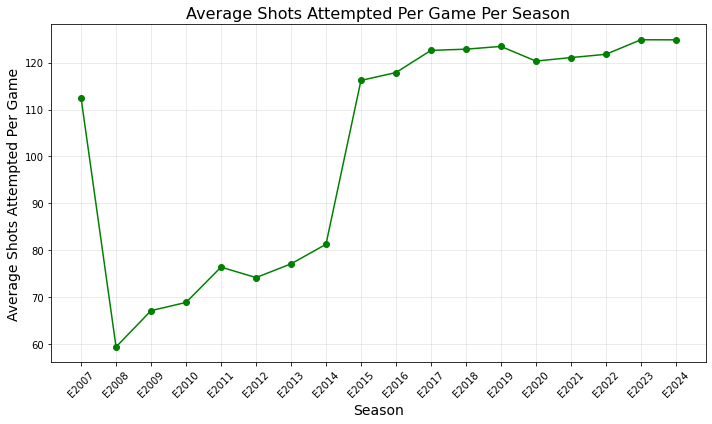

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for three-pointers made
df_three_pointers = df_points[(df_points['action_id'] == '3FGA') | (df_points['action_id'] == '2FGA') | (df_points['action_id'] == '3FGM') | (df_points['action_id'] == '2FGM')]

# Group by game_id to get the total three-pointers per game
three_pointers_per_game = df_three_pointers.groupby(['game_id', 'season_code'])['action_id'].count().reset_index()
three_pointers_per_game.rename(columns={'action_id': 'three_pointers_per_game'}, inplace=True)

# Group by season_code and calculate the average three-pointers per game
average_three_pointers_by_season = (
    three_pointers_per_game.groupby('season_code')['three_pointers_per_game']
    .mean()
    .reset_index()
)
average_three_pointers_by_season.rename(columns={'three_pointers_per_game': 'average_three_pointers'}, inplace=True)

# Sort by season_code (optional, if not already sorted)
average_three_pointers_by_season = average_three_pointers_by_season.sort_values('season_code')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_three_pointers_by_season['season_code'],
         average_three_pointers_by_season['average_three_pointers'],
         marker='o', color='green')
plt.title('Average Shots Attempted Per Game Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Shots Attempted Per Game', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


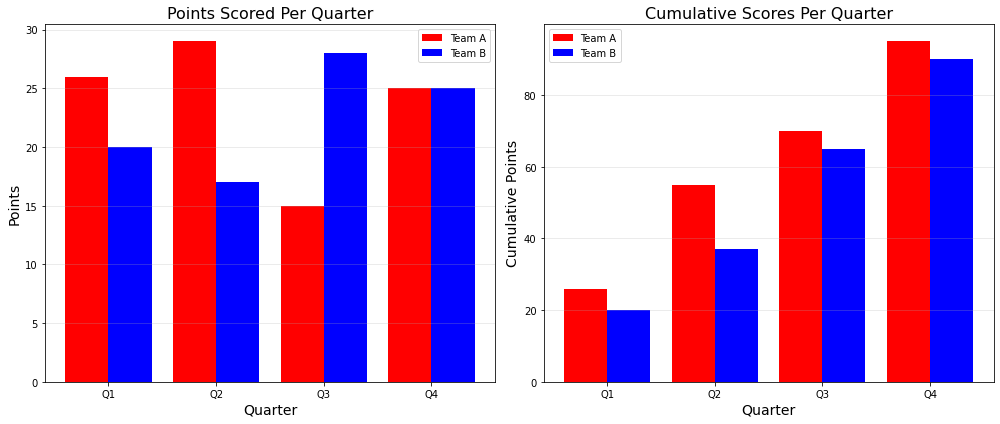

In [19]:
import matplotlib.pyplot as plt

first_game = df_header.iloc[0]

# Extract the first game's cumulative scores per quarter for both teams
quarters = ['score_quarter_1', 'score_quarter_2', 'score_quarter_3', 'score_quarter_4']

# Cumulative scores for Team A and Team B
cumulative_team_a = [first_game[f"{q}_a"] for q in quarters]
cumulative_team_b = [first_game[f"{q}_b"] for q in quarters]

# Compute points scored per quarter
points_team_a = [cumulative_team_a[0]] + [cumulative_team_a[i] - cumulative_team_a[i-1] for i in range(1, len(cumulative_team_a))]
points_team_b = [cumulative_team_b[0]] + [cumulative_team_b[i] - cumulative_team_b[i-1] for i in range(1, len(cumulative_team_b))]

# Define quarter labels
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Create a figure with 2 subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Points scored per quarter
plt.subplot(1, 2, 1)
x = range(len(labels))
width = 0.4
plt.bar([p - width/2 for p in x], points_team_a, width=width, label='Team A', color='red')
plt.bar([p + width/2 for p in x], points_team_b, width=width, label='Team B', color='blue')
plt.xticks(x, labels)
plt.title('Points Scored Per Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Cumulative scores per quarter
plt.subplot(1, 2, 2)
plt.bar([p - width/2 for p in x], cumulative_team_a, width=width, label='Team A', color='red')
plt.bar([p + width/2 for p in x], cumulative_team_b, width=width, label='Team B', color='blue')
plt.xticks(x, labels)
plt.title('Cumulative Scores Per Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Cumulative Points', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


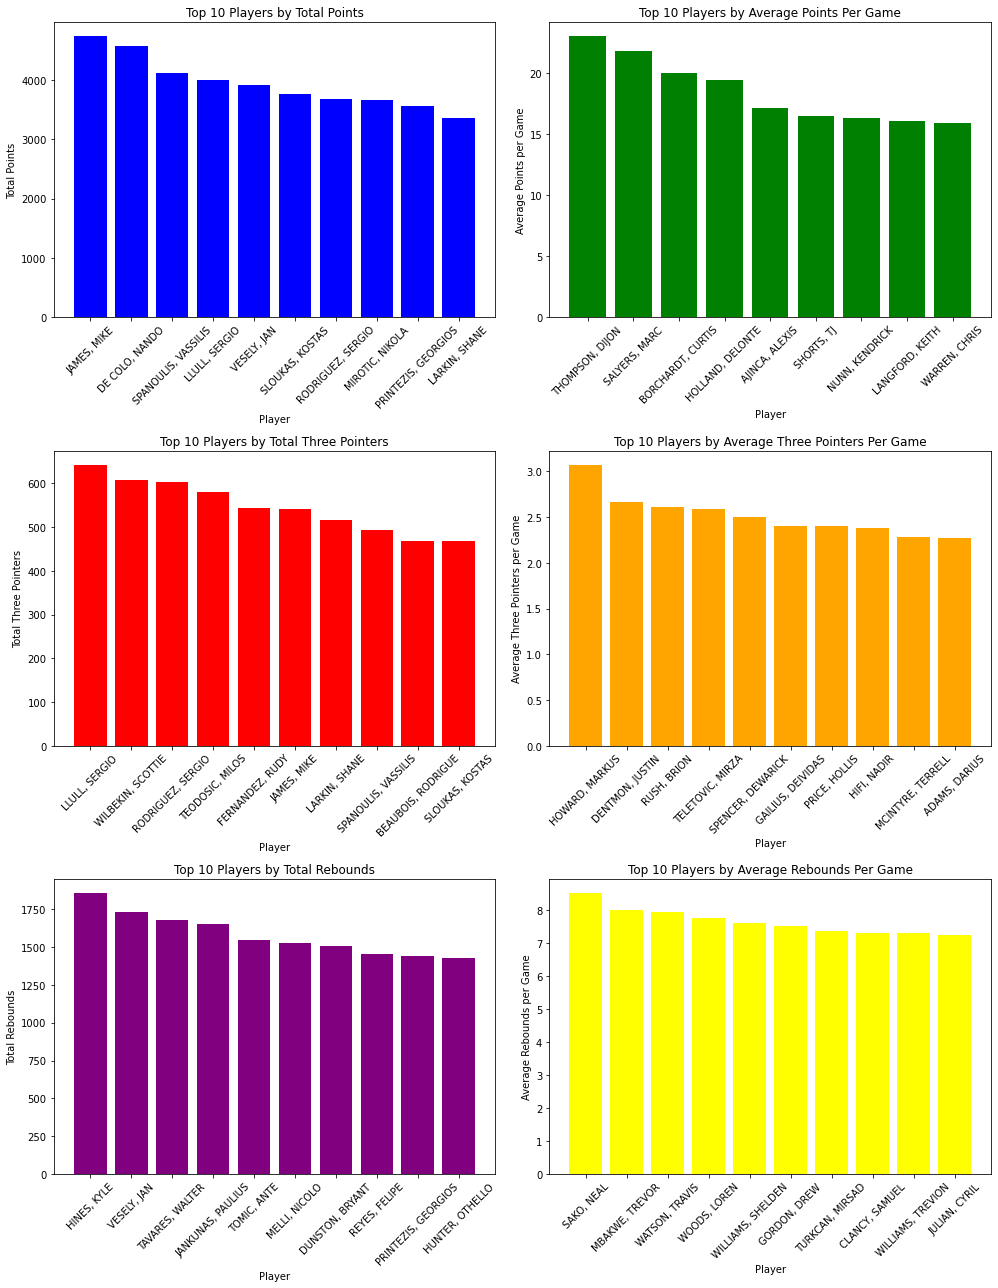

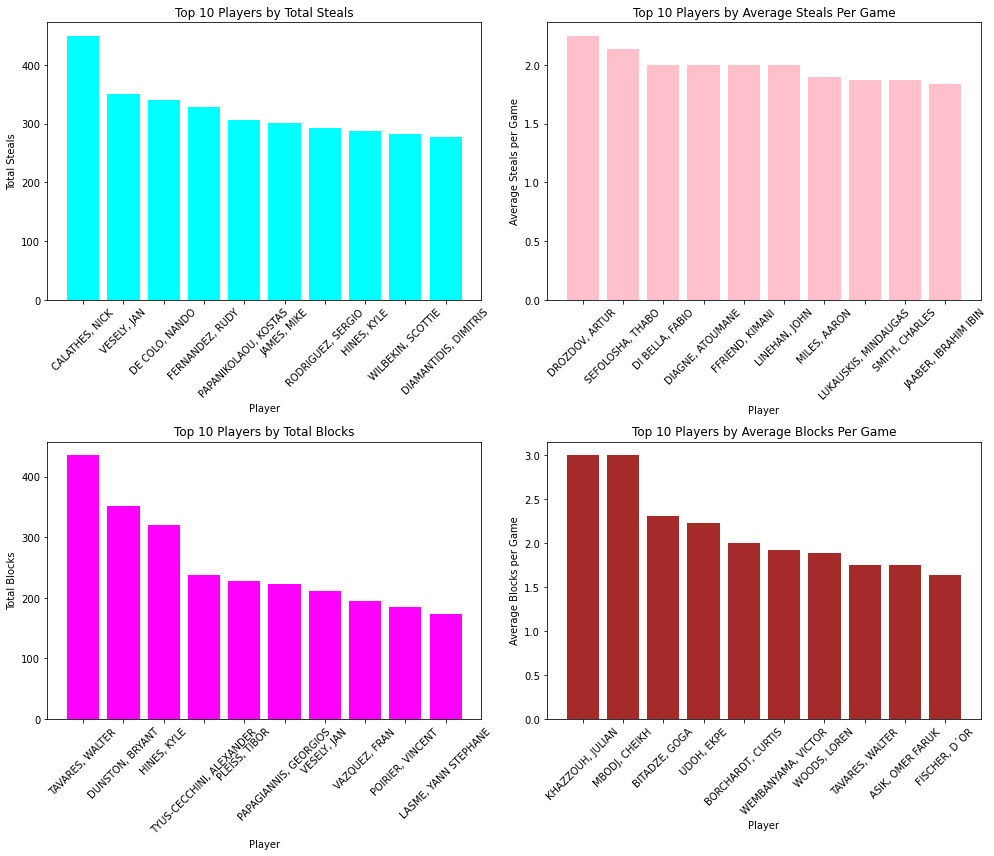

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total metrics by summing up across all seasons
df_players_total = df_players.groupby('player')[[
    'points', 'three_points_made', 'total_rebounds', 'assists', 'steals', 'blocks_favour'
]].sum()

# Calculate average metrics by averaging per game across all seasons
df_players_avg = df_players.groupby('player')[[
    'points_per_game', 'three_points_made_per_game', 'total_rebounds_per_game',
    'assists_per_game', 'steals_per_game', 'blocks_favour_per_game'
]].mean()

# Top 10 players by total points scored
top_10_points = df_players_total['points'].nlargest(10)

# Top 10 players by average points per game
top_10_avg_points = df_players_avg['points_per_game'].nlargest(10)

# Top 10 players by total three pointers scored
top_10_three_pointers = df_players_total['three_points_made'].nlargest(10)

# Top 10 players by average three pointers per game
top_10_avg_three_pointers = df_players_avg['three_points_made_per_game'].nlargest(10)

# Top 10 players by total rebounds
top_10_rebounds = df_players_total['total_rebounds'].nlargest(10)

# Top 10 players by average rebounds per game
top_10_avg_rebounds = df_players_avg['total_rebounds_per_game'].nlargest(10)

# Top 10 players by total assists
top_10_assists = df_players_total['assists'].nlargest(10)

# Top 10 players by average assists per game
top_10_avg_assists = df_players_avg['assists_per_game'].nlargest(10)

# Top 10 players by total steals
top_10_steals = df_players_total['steals'].nlargest(10)

# Top 10 players by average steals per game
top_10_avg_steals = df_players_avg['steals_per_game'].nlargest(10)

# Top 10 players by total blocks
top_10_blocks = df_players_total['blocks_favour'].nlargest(10)

# Top 10 players by average blocks per game
top_10_avg_blocks = df_players_avg['blocks_favour_per_game'].nlargest(10)

# Plot all bar charts
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Bar chart for Total Points
axes[0, 0].bar(top_10_points.index, top_10_points.values, color='blue')
axes[0, 0].set_title('Top 10 Players by Total Points')
axes[0, 0].set_xlabel('Player')
axes[0, 0].set_ylabel('Total Points')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Points Per Game
axes[0, 1].bar(top_10_avg_points.index, top_10_avg_points.values, color='green')
axes[0, 1].set_title('Top 10 Players by Average Points Per Game')
axes[0, 1].set_xlabel('Player')
axes[0, 1].set_ylabel('Average Points per Game')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Three Pointers
axes[1, 0].bar(top_10_three_pointers.index, top_10_three_pointers.values, color='red')
axes[1, 0].set_title('Top 10 Players by Total Three Pointers')
axes[1, 0].set_xlabel('Player')
axes[1, 0].set_ylabel('Total Three Pointers')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Three Pointers Per Game
axes[1, 1].bar(top_10_avg_three_pointers.index, top_10_avg_three_pointers.values, color='orange')
axes[1, 1].set_title('Top 10 Players by Average Three Pointers Per Game')
axes[1, 1].set_xlabel('Player')
axes[1, 1].set_ylabel('Average Three Pointers per Game')
axes[1, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Rebounds
axes[2, 0].bar(top_10_rebounds.index, top_10_rebounds.values, color='purple')
axes[2, 0].set_title('Top 10 Players by Total Rebounds')
axes[2, 0].set_xlabel('Player')
axes[2, 0].set_ylabel('Total Rebounds')
axes[2, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Rebounds Per Game
axes[2, 1].bar(top_10_avg_rebounds.index, top_10_avg_rebounds.values, color='yellow')
axes[2, 1].set_title('Top 10 Players by Average Rebounds Per Game')
axes[2, 1].set_xlabel('Player')
axes[2, 1].set_ylabel('Average Rebounds per Game')
axes[2, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Plot for Steals and Blocks
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Bar chart for Total Steals
axes[0, 0].bar(top_10_steals.index, top_10_steals.values, color='cyan')
axes[0, 0].set_title('Top 10 Players by Total Steals')
axes[0, 0].set_xlabel('Player')
axes[0, 0].set_ylabel('Total Steals')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Steals Per Game
axes[0, 1].bar(top_10_avg_steals.index, top_10_avg_steals.values, color='pink')
axes[0, 1].set_title('Top 10 Players by Average Steals Per Game')
axes[0, 1].set_xlabel('Player')
axes[0, 1].set_ylabel('Average Steals per Game')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Blocks
axes[1, 0].bar(top_10_blocks.index, top_10_blocks.values, color='magenta')
axes[1, 0].set_title('Top 10 Players by Total Blocks')
axes[1, 0].set_xlabel('Player')
axes[1, 0].set_ylabel('Total Blocks')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Blocks Per Game
axes[1, 1].bar(top_10_avg_blocks.index, top_10_avg_blocks.values, color='brown')
axes[1, 1].set_title('Top 10 Players by Average Blocks Per Game')
axes[1, 1].set_xlabel('Player')
axes[1, 1].set_ylabel('Average Blocks per Game')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


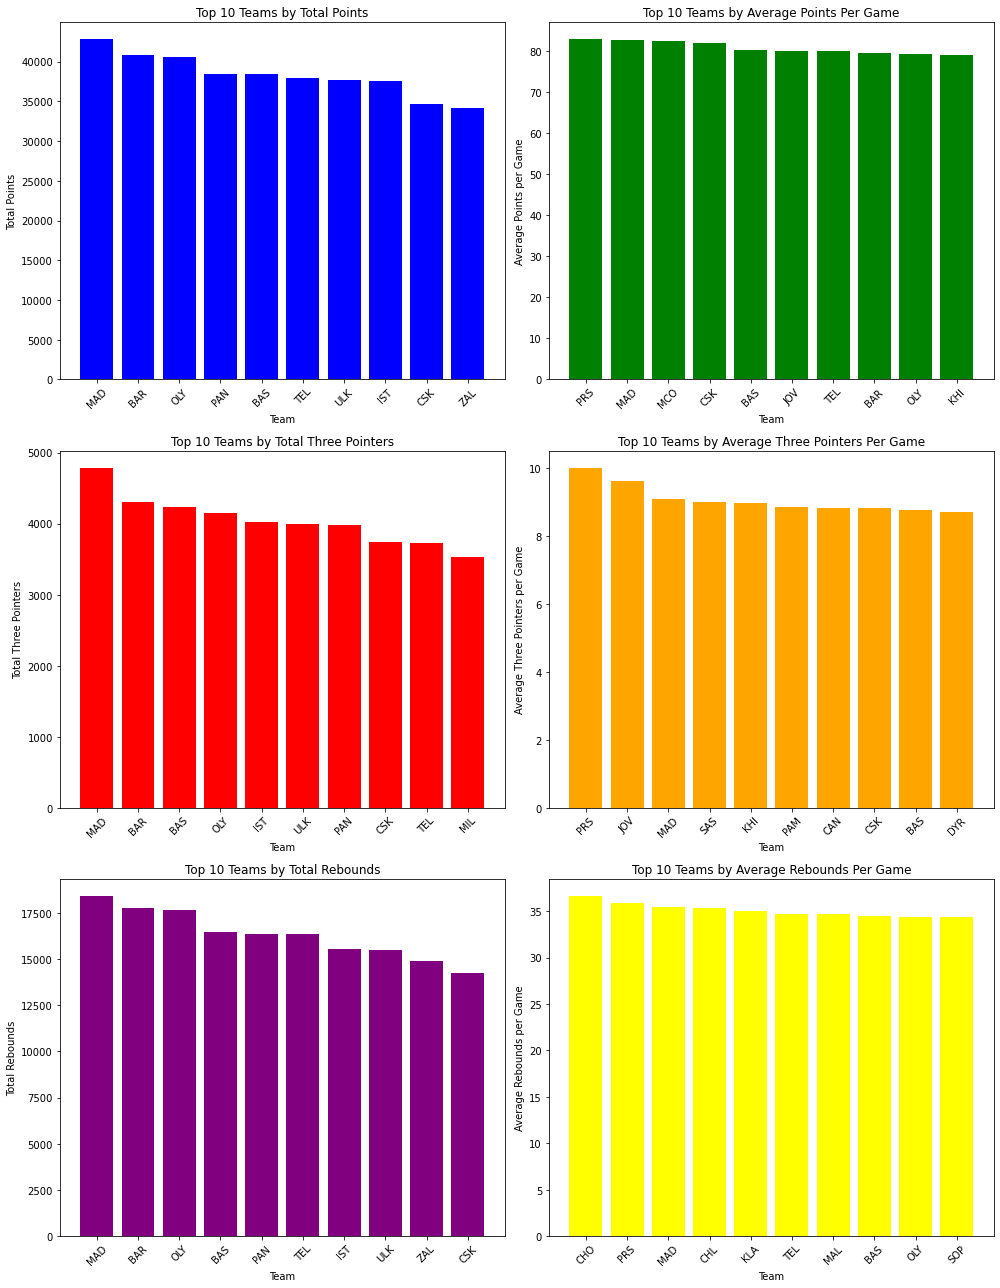

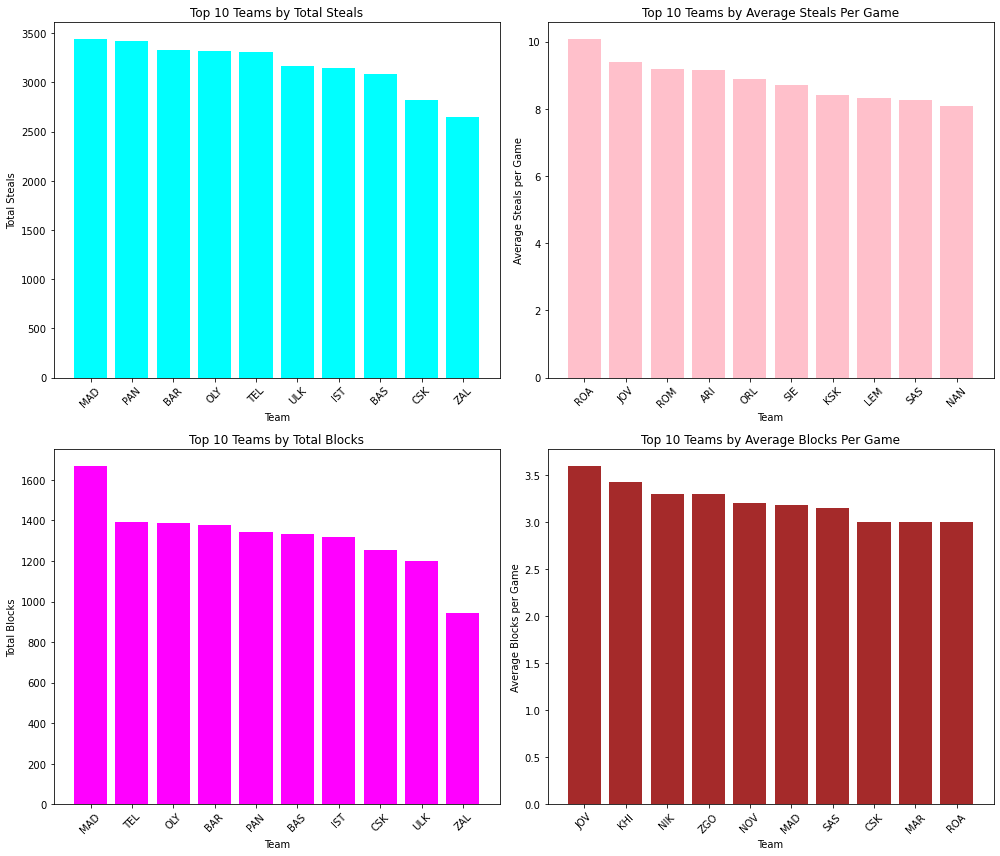

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total metrics by summing up across all seasons for teams
df_teams_total = df_teams.groupby('team_id')[[
    'points', 'three_points_made', 'total_rebounds', 'assists', 'steals', 'blocks_favour'
]].sum()

# Calculate average metrics by averaging per game across all seasons for teams
df_teams_avg = df_teams.groupby('team_id')[[
    'points_per_game', 'three_points_made_per_game', 'total_rebounds_per_game',
    'assists_per_game', 'steals_per_game', 'blocks_favour_per_game'
]].mean()

# Top 10 teams by total points scored
top_10_teams_points = df_teams_total['points'].nlargest(10)

# Top 10 teams by average points per game
top_10_teams_avg_points = df_teams_avg['points_per_game'].nlargest(10)

# Top 10 teams by total three pointers scored
top_10_teams_three_pointers = df_teams_total['three_points_made'].nlargest(10)

# Top 10 teams by average three pointers per game
top_10_teams_avg_three_pointers = df_teams_avg['three_points_made_per_game'].nlargest(10)

# Top 10 teams by total rebounds
top_10_teams_rebounds = df_teams_total['total_rebounds'].nlargest(10)

# Top 10 teams by average rebounds per game
top_10_teams_avg_rebounds = df_teams_avg['total_rebounds_per_game'].nlargest(10)

# Top 10 teams by total assists
top_10_teams_assists = df_teams_total['assists'].nlargest(10)

# Top 10 teams by average assists per game
top_10_teams_avg_assists = df_teams_avg['assists_per_game'].nlargest(10)

# Top 10 teams by total steals
top_10_teams_steals = df_teams_total['steals'].nlargest(10)

# Top 10 teams by average steals per game
top_10_teams_avg_steals = df_teams_avg['steals_per_game'].nlargest(10)

# Top 10 teams by total blocks
top_10_teams_blocks = df_teams_total['blocks_favour'].nlargest(10)

# Top 10 teams by average blocks per game
top_10_teams_avg_blocks = df_teams_avg['blocks_favour_per_game'].nlargest(10)

# Plot all bar charts
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Bar chart for Total Points
axes[0, 0].bar(top_10_teams_points.index, top_10_teams_points.values, color='blue')
axes[0, 0].set_title('Top 10 Teams by Total Points')
axes[0, 0].set_xlabel('Team')
axes[0, 0].set_ylabel('Total Points')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Points Per Game
axes[0, 1].bar(top_10_teams_avg_points.index, top_10_teams_avg_points.values, color='green')
axes[0, 1].set_title('Top 10 Teams by Average Points Per Game')
axes[0, 1].set_xlabel('Team')
axes[0, 1].set_ylabel('Average Points per Game')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Three Pointers
axes[1, 0].bar(top_10_teams_three_pointers.index, top_10_teams_three_pointers.values, color='red')
axes[1, 0].set_title('Top 10 Teams by Total Three Pointers')
axes[1, 0].set_xlabel('Team')
axes[1, 0].set_ylabel('Total Three Pointers')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Three Pointers Per Game
axes[1, 1].bar(top_10_teams_avg_three_pointers.index, top_10_teams_avg_three_pointers.values, color='orange')
axes[1, 1].set_title('Top 10 Teams by Average Three Pointers Per Game')
axes[1, 1].set_xlabel('Team')
axes[1, 1].set_ylabel('Average Three Pointers per Game')
axes[1, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Rebounds
axes[2, 0].bar(top_10_teams_rebounds.index, top_10_teams_rebounds.values, color='purple')
axes[2, 0].set_title('Top 10 Teams by Total Rebounds')
axes[2, 0].set_xlabel('Team')
axes[2, 0].set_ylabel('Total Rebounds')
axes[2, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Rebounds Per Game
axes[2, 1].bar(top_10_teams_avg_rebounds.index, top_10_teams_avg_rebounds.values, color='yellow')
axes[2, 1].set_title('Top 10 Teams by Average Rebounds Per Game')
axes[2, 1].set_xlabel('Team')
axes[2, 1].set_ylabel('Average Rebounds per Game')
axes[2, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Plot for Steals and Blocks
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Bar chart for Total Steals
axes[0, 0].bar(top_10_teams_steals.index, top_10_teams_steals.values, color='cyan')
axes[0, 0].set_title('Top 10 Teams by Total Steals')
axes[0, 0].set_xlabel('Team')
axes[0, 0].set_ylabel('Total Steals')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Steals Per Game
axes[0, 1].bar(top_10_teams_avg_steals.index, top_10_teams_avg_steals.values, color='pink')
axes[0, 1].set_title('Top 10 Teams by Average Steals Per Game')
axes[0, 1].set_xlabel('Team')
axes[0, 1].set_ylabel('Average Steals per Game')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Blocks
axes[1, 0].bar(top_10_teams_blocks.index, top_10_teams_blocks.values, color='magenta')
axes[1, 0].set_title('Top 10 Teams by Total Blocks')
axes[1, 0].set_xlabel('Team')
axes[1, 0].set_ylabel('Total Blocks')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Blocks Per Game
axes[1, 1].bar(top_10_teams_avg_blocks.index, top_10_teams_avg_blocks.values, color='brown')
axes[1, 1].set_title('Top 10 Teams by Average Blocks Per Game')
axes[1, 1].set_xlabel('Team')
axes[1, 1].set_ylabel('Average Blocks per Game')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


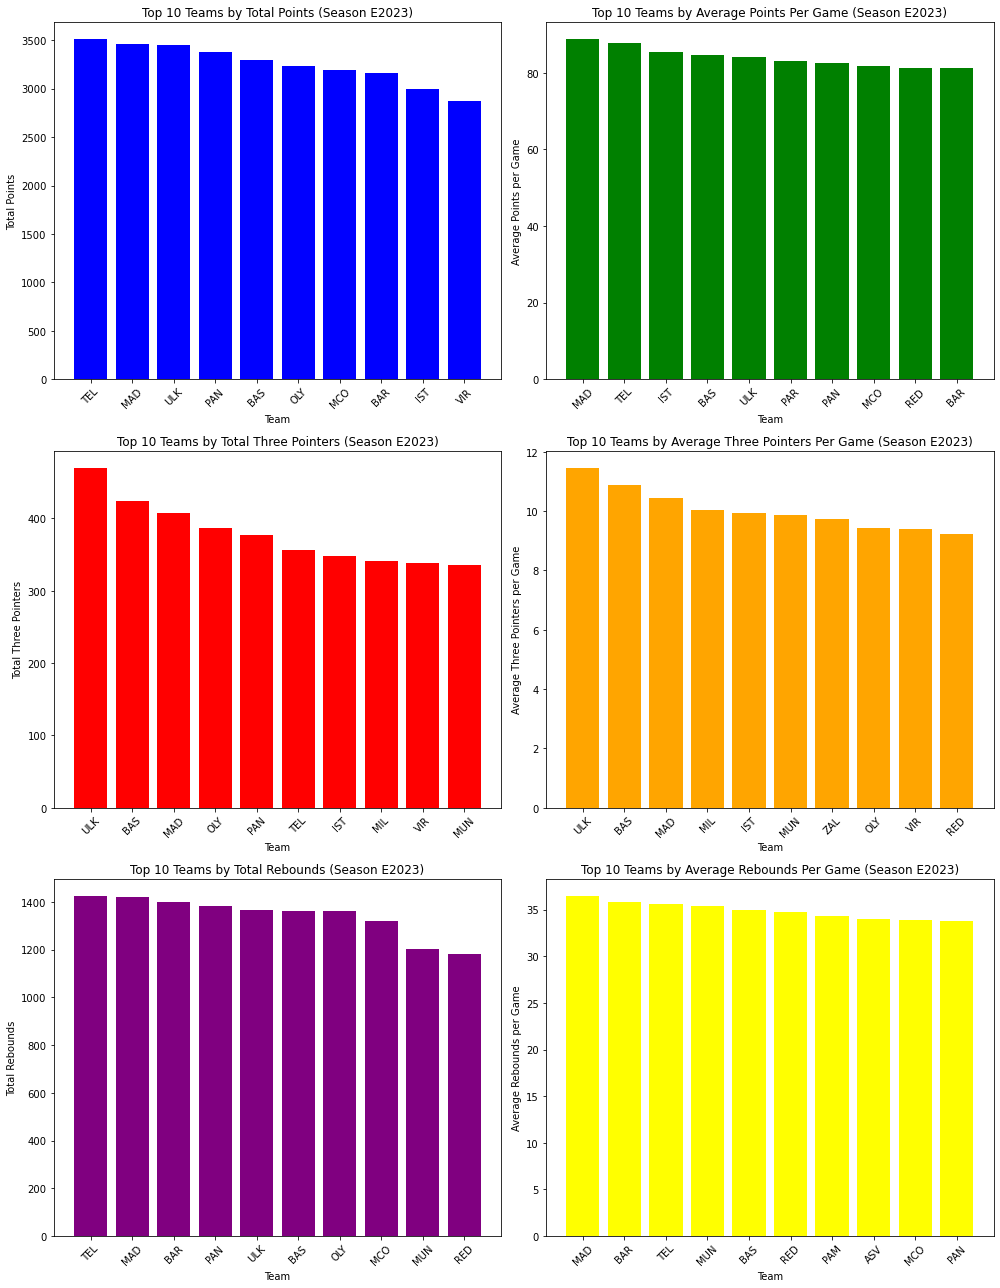

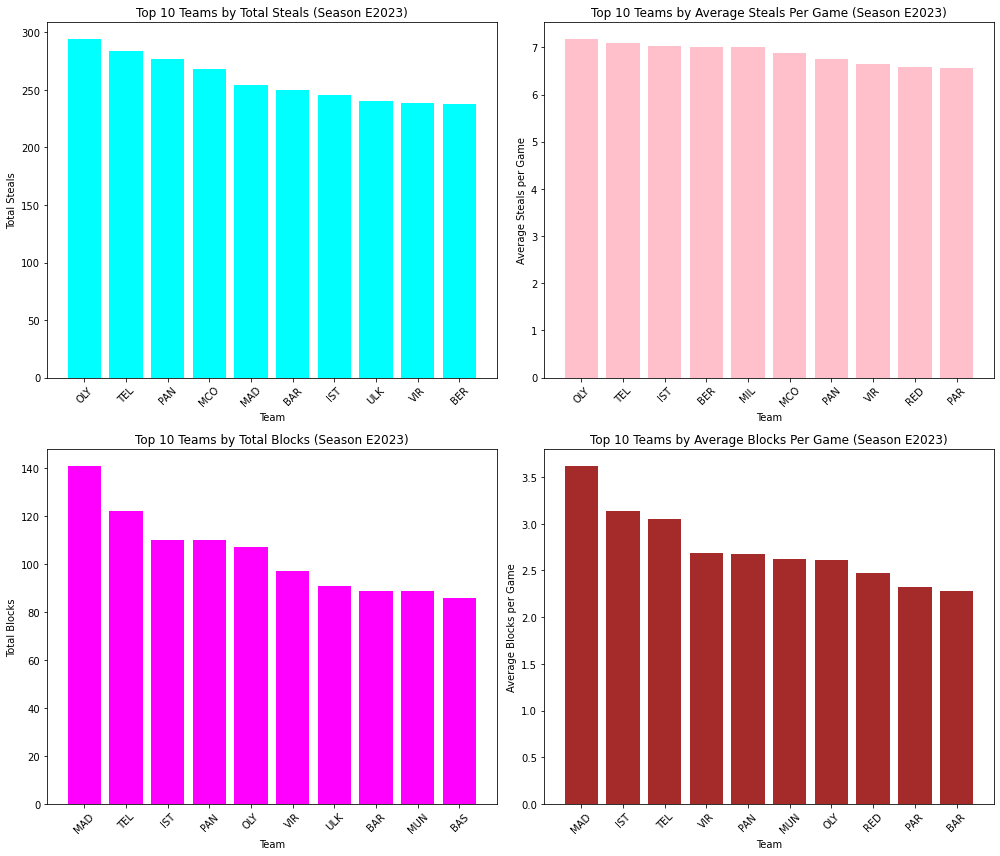

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset for the specific season 'E2023'
df_teams_season = df_teams[df_teams['season_code'] == 'E2023']

# Calculate total metrics by summing up across all games for teams in 'E2023'
df_teams_total_season = df_teams_season.groupby('team_id')[[
    'points', 'three_points_made', 'total_rebounds', 'assists', 'steals', 'blocks_favour'
]].sum()

# Calculate average metrics by averaging per game across all games for teams in 'E2023'
df_teams_avg_season = df_teams_season.groupby('team_id')[[
    'points_per_game', 'three_points_made_per_game', 'total_rebounds_per_game',
    'assists_per_game', 'steals_per_game', 'blocks_favour_per_game'
]].mean()

# Top 10 teams by total points scored in season 'E2023'
top_10_teams_points_season = df_teams_total_season['points'].nlargest(10)

# Top 10 teams by average points per game in season 'E2023'
top_10_teams_avg_points_season = df_teams_avg_season['points_per_game'].nlargest(10)

# Top 10 teams by total three pointers scored in season 'E2023'
top_10_teams_three_pointers_season = df_teams_total_season['three_points_made'].nlargest(10)

# Top 10 teams by average three pointers per game in season 'E2023'
top_10_teams_avg_three_pointers_season = df_teams_avg_season['three_points_made_per_game'].nlargest(10)

# Top 10 teams by total rebounds in season 'E2023'
top_10_teams_rebounds_season = df_teams_total_season['total_rebounds'].nlargest(10)

# Top 10 teams by average rebounds per game in season 'E2023'
top_10_teams_avg_rebounds_season = df_teams_avg_season['total_rebounds_per_game'].nlargest(10)

# Top 10 teams by total assists in season 'E2023'
top_10_teams_assists_season = df_teams_total_season['assists'].nlargest(10)

# Top 10 teams by average assists per game in season 'E2023'
top_10_teams_avg_assists_season = df_teams_avg_season['assists_per_game'].nlargest(10)

# Top 10 teams by total steals in season 'E2023'
top_10_teams_steals_season = df_teams_total_season['steals'].nlargest(10)

# Top 10 teams by average steals per game in season 'E2023'
top_10_teams_avg_steals_season = df_teams_avg_season['steals_per_game'].nlargest(10)

# Top 10 teams by total blocks in season 'E2023'
top_10_teams_blocks_season = df_teams_total_season['blocks_favour'].nlargest(10)

# Top 10 teams by average blocks per game in season 'E2023'
top_10_teams_avg_blocks_season = df_teams_avg_season['blocks_favour_per_game'].nlargest(10)

# Plot all bar charts for season 'E2023'
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Bar chart for Total Points
axes[0, 0].bar(top_10_teams_points_season.index, top_10_teams_points_season.values, color='blue')
axes[0, 0].set_title('Top 10 Teams by Total Points (Season E2023)')
axes[0, 0].set_xlabel('Team')
axes[0, 0].set_ylabel('Total Points')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Points Per Game
axes[0, 1].bar(top_10_teams_avg_points_season.index, top_10_teams_avg_points_season.values, color='green')
axes[0, 1].set_title('Top 10 Teams by Average Points Per Game (Season E2023)')
axes[0, 1].set_xlabel('Team')
axes[0, 1].set_ylabel('Average Points per Game')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Three Pointers
axes[1, 0].bar(top_10_teams_three_pointers_season.index, top_10_teams_three_pointers_season.values, color='red')
axes[1, 0].set_title('Top 10 Teams by Total Three Pointers (Season E2023)')
axes[1, 0].set_xlabel('Team')
axes[1, 0].set_ylabel('Total Three Pointers')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Three Pointers Per Game
axes[1, 1].bar(top_10_teams_avg_three_pointers_season.index, top_10_teams_avg_three_pointers_season.values, color='orange')
axes[1, 1].set_title('Top 10 Teams by Average Three Pointers Per Game (Season E2023)')
axes[1, 1].set_xlabel('Team')
axes[1, 1].set_ylabel('Average Three Pointers per Game')
axes[1, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Rebounds
axes[2, 0].bar(top_10_teams_rebounds_season.index, top_10_teams_rebounds_season.values, color='purple')
axes[2, 0].set_title('Top 10 Teams by Total Rebounds (Season E2023)')
axes[2, 0].set_xlabel('Team')
axes[2, 0].set_ylabel('Total Rebounds')
axes[2, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Rebounds Per Game
axes[2, 1].bar(top_10_teams_avg_rebounds_season.index, top_10_teams_avg_rebounds_season.values, color='yellow')
axes[2, 1].set_title('Top 10 Teams by Average Rebounds Per Game (Season E2023)')
axes[2, 1].set_xlabel('Team')
axes[2, 1].set_ylabel('Average Rebounds per Game')
axes[2, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Plot for Steals and Blocks for season 'E2023'
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Bar chart for Total Steals
axes[0, 0].bar(top_10_teams_steals_season.index, top_10_teams_steals_season.values, color='cyan')
axes[0, 0].set_title('Top 10 Teams by Total Steals (Season E2023)')
axes[0, 0].set_xlabel('Team')
axes[0, 0].set_ylabel('Total Steals')
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Steals Per Game
axes[0, 1].bar(top_10_teams_avg_steals_season.index, top_10_teams_avg_steals_season.values, color='pink')
axes[0, 1].set_title('Top 10 Teams by Average Steals Per Game (Season E2023)')
axes[0, 1].set_xlabel('Team')
axes[0, 1].set_ylabel('Average Steals per Game')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar chart for Total Blocks
axes[1, 0].bar(top_10_teams_blocks_season.index, top_10_teams_blocks_season.values, color='magenta')
axes[1, 0].set_title('Top 10 Teams by Total Blocks (Season E2023)')
axes[1, 0].set_xlabel('Team')
axes[1, 0].set_ylabel('Total Blocks')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar chart for Average Blocks Per Game
axes[1, 1].bar(top_10_teams_avg_blocks_season.index, top_10_teams_avg_blocks_season.values, color='brown')
axes[1, 1].set_title('Top 10 Teams by Average Blocks Per Game (Season E2023)')
axes[1, 1].set_xlabel('Team')
axes[1, 1].set_ylabel('Average Blocks per Game')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better readability
plt.tight_layout()
plt.show()


# PREDICTING WHO WOULD WIN A GAME

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.multioutput import MultiOutputRegressor

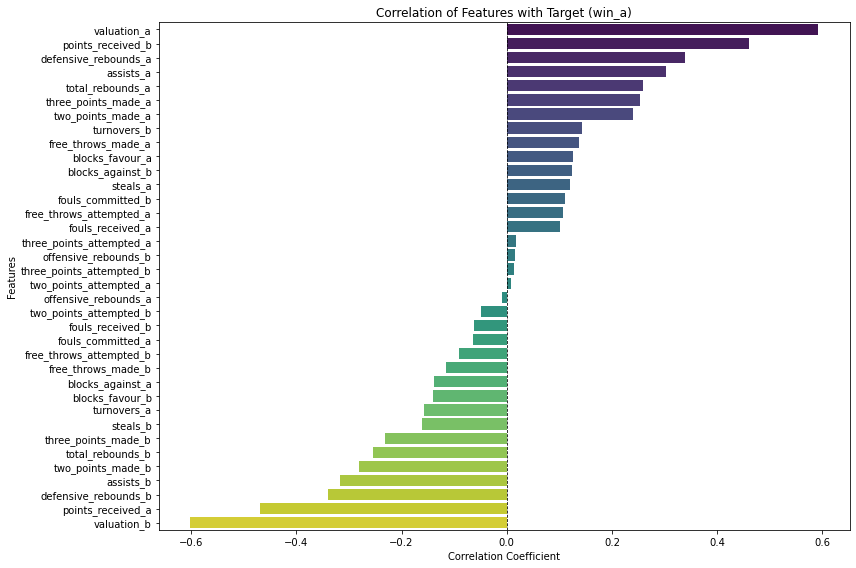

Top Correlated Features with Target (win_a):
valuation_a                 0.592135
points_received_b           0.460058
defensive_rebounds_a        0.338988
assists_a                   0.302001
total_rebounds_a            0.258942
three_points_made_a         0.252792
two_points_made_a           0.239637
turnovers_b                 0.142910
free_throws_made_a          0.137517
blocks_favour_a             0.126273
blocks_against_b            0.123614
steals_a                    0.119319
fouls_committed_b           0.110368
free_throws_attempted_a     0.107234
fouls_received_a            0.101759
three_points_attempted_a    0.017166
offensive_rebounds_b        0.015027
three_points_attempted_b    0.013854
two_points_attempted_a      0.007220
offensive_rebounds_a       -0.008645
two_points_attempted_b     -0.049506
fouls_received_b           -0.062267
fouls_committed_a          -0.064918
free_throws_attempted_b    -0.090377
free_throws_made_b         -0.114593
blocks_against_a           -0.

In [24]:

# Step 3.1: Define numeric features
numeric_features = [
    'two_points_made_a', 'two_points_attempted_a', 'three_points_made_a', 'three_points_attempted_a',
    'free_throws_made_a', 'free_throws_attempted_a', 'offensive_rebounds_a', 'defensive_rebounds_a',
    'total_rebounds_a', 'assists_a', 'steals_a', 'turnovers_a', 'blocks_favour_a', 'blocks_against_a',
    'fouls_committed_a', 'fouls_received_a', 'valuation_a', 'points_received_a',
    'two_points_made_b', 'two_points_attempted_b', 'three_points_made_b', 'three_points_attempted_b',
    'free_throws_made_b', 'free_throws_attempted_b', 'offensive_rebounds_b', 'defensive_rebounds_b',
    'total_rebounds_b', 'assists_b', 'steals_b', 'turnovers_b', 'blocks_favour_b', 'blocks_against_b',
    'fouls_committed_b', 'fouls_received_b', 'valuation_b', 'points_received_b'
]

# Compute correlation matrix
#correlation_matrix = merged_df_team_stats_each_game[numeric_features + ['win_a']].corr()
correlation_matrix = merged_df_team_stats_each_game_all_games[numeric_features + ['win_a']].corr()
correlations_with_target = correlation_matrix['win_a'].drop('win_a').sort_values(ascending=False)

# Visualize the top correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette='viridis')
plt.title('Correlation of Features with Target (win_a)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

# Display top correlated features
print("Top Correlated Features with Target (win_a):")
print(correlations_with_target)


In [25]:
# Step 3.2: Define features and target for modeling
features = [
    'defensive_rebounds_a', 'offensive_rebounds_a', 'assists_a', 'three_points_made_a', 'turnovers_a', 'blocks_favour_a', 'steals_a',
    'defensive_rebounds_b', 'offensive_rebounds_b', 'assists_b', 'three_points_made_b', 'turnovers_b', 'blocks_favour_b', 'steals_b']

target = 'win_a'

#X = merged_df_team_stats_each_game[features]
#y = merged_df_team_stats_each_game[target]


X = merged_df_team_stats_each_game_all_games[features]
y = merged_df_team_stats_each_game_all_games[target]

# Step 3.3: Train-test split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)


print("Length of X_train:", len(X_train_all))
print("Length of X_test:", len(X_test_all))
print("Length of y_train:", len(y_train_all))
print("Length of y_test:", len(y_test_all))

Length of X_train: 6373
Length of X_test: 1594
Length of y_train: 6373
Length of y_test: 1594


In [26]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_all, y_train_all)
logistic_preds = logistic_model.predict(X_test_all)

print("Logistic Regression Performance:")
print(classification_report(y_test_all, logistic_preds))
print("Accuracy:", accuracy_score(y_test_all, logistic_preds))
print("MSE:", mean_squared_error(y_test_all, logistic_preds))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1014
           1       0.89      0.87      0.88       580

    accuracy                           0.91      1594
   macro avg       0.91      0.90      0.90      1594
weighted avg       0.91      0.91      0.91      1594

Accuracy: 0.911543287327478
MSE: 0.08845671267252196


In [27]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_all, y_train_all)
rf_preds = rf_model.predict(X_test_all)

print("\nRandom Forest Performance:")
print(classification_report(y_test_all, rf_preds))
print("Accuracy:", accuracy_score(y_test_all, rf_preds))
print("MSE:", mean_squared_error(y_test_all, rf_preds))



Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1014
           1       0.86      0.74      0.80       580

    accuracy                           0.86      1594
   macro avg       0.86      0.84      0.85      1594
weighted avg       0.86      0.86      0.86      1594

Accuracy: 0.8626097867001254
MSE: 0.13739021329987453


In [28]:
# Example team IDs for the matchup
team_a_id = 'BAR'
team_b_id = 'ASV'

# Fetch stats for both teams for the season E2024
team_a_stats = df_teams[(df_teams['team_id'] == team_a_id) & (df_teams['season_code'] == 'E2024')].iloc[0]
team_b_stats = df_teams[(df_teams['team_id'] == team_b_id) & (df_teams['season_code'] == 'E2024')].iloc[0]

# Define input features for the matchup
input_features = {
    'defensive_rebounds_a': team_a_stats['defensive_rebounds_per_game'],
    'offensive_rebounds_a': team_a_stats['offensive_rebounds_per_game'],
    'assists_a': team_a_stats['assists_per_game'],
    'three_points_made_a': team_a_stats['three_points_made_per_game'],
    'turnovers_a': team_a_stats['turnovers_per_game'],
    'blocks_favour_a': team_a_stats['blocks_favour_per_game'],
    'steals_a': team_a_stats['steals_per_game'],
    'defensive_rebounds_b': team_b_stats['defensive_rebounds_per_game'],
    'offensive_rebounds_b': team_b_stats['offensive_rebounds_per_game'],
    'assists_b': team_b_stats['assists_per_game'],
    'three_points_made_b': team_b_stats['three_points_made_per_game'],
    'turnovers_b': team_b_stats['turnovers_per_game'],
    'blocks_favour_b': team_b_stats['blocks_favour_per_game'],
    'steals_b': team_b_stats['steals_per_game'],
}


# Convert to DataFrame
input_data = pd.DataFrame([input_features])

# Predict
logistic_prediction = logistic_model.predict(input_data)[0]
rf_prediction = rf_model.predict(input_data)[0]

print(f"Logistic Model Prediction: {'Team A Wins' if logistic_prediction == 1 else 'Team B Wins'}")
print(f"Random Forest Prediction: {'Team A Wins' if rf_prediction == 1 else 'Team B Wins'}")


Logistic Model Prediction: Team A Wins
Random Forest Prediction: Team A Wins


# PREDICTING SCORES

In [29]:
# Define features for both teams
features = [
    'defensive_rebounds_a', 'offensive_rebounds_a', 'assists_a',
    'three_points_made_a', 'turnovers_a', 'blocks_favour_a', 'steals_a',
    'defensive_rebounds_b', 'offensive_rebounds_b', 'assists_b',
    'three_points_made_b', 'turnovers_b', 'blocks_favour_b', 'steals_b']

# Targets
targets = ['points_a', 'points_b']

# Input features and targets
X = merged_df_team_stats_each_game[features]
y = merged_df_team_stats_each_game[targets]

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model
linear_regressor = MultiOutputRegressor(LinearRegression())
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_regressor.predict(X_test)

# Evaluate the model
mse_linear_points_a = mean_squared_error(y_test['points_a'], y_pred_linear[:, 0])
mse_linear_points_b = mean_squared_error(y_test['points_b'], y_pred_linear[:, 1])

print(f"Linear Regression - MSE for points_a: {mse_linear_points_a}")
print(f"Linear Regression - MSE for points_b: {mse_linear_points_b}")

# Predict points for the example teams
predicted_points_linear = linear_regressor.predict(input_data)
predicted_points_a_linear = predicted_points_linear[0][0]
predicted_points_b_linear = predicted_points_linear[0][1]

print(f"Linear Regression Predicted Points - Team A: {predicted_points_a_linear:.2f}")
print(f"Linear Regression Predicted Points - Team B: {predicted_points_b_linear:.2f}")



#Linear Regression - MSE for points_a: 52.00382467233077
#Linear Regression - MSE for points_b: 50.91385157685053 -> mejor no usar eurocup
#Linear Regression Predicted Points - Team A: 79.82
#Linear Regression Predicted Points - Team B: 78.80


Linear Regression - MSE for points_a: 43.96211009567362
Linear Regression - MSE for points_b: 42.632291905835025
Linear Regression Predicted Points - Team A: 84.91
Linear Regression Predicted Points - Team B: 80.42


# PREDICTING SCORES OTHER MODELS

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting model
gb_regressor = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gb_regressor.fit(X_train, y_train)
y_pred_gb = gb_regressor.predict(X_test)

# Evaluate
mse_gb_points_a = mean_squared_error(y_test['points_a'], y_pred_gb[:, 0])
mse_gb_points_b = mean_squared_error(y_test['points_b'], y_pred_gb[:, 1])
print(f"Gradient Boosting - MSE for points_a: {mse_gb_points_a}")
print(f"Gradient Boosting - MSE for points_b: {mse_gb_points_b}")




Gradient Boosting - MSE for points_a: 46.32385664166705
Gradient Boosting - MSE for points_b: 47.00225375093923


In [32]:
from sklearn.svm import SVR

# Support Vector Regressor
svr_regressor = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, epsilon=0.1))
svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)

# Evaluate
mse_svr_points_a = mean_squared_error(y_test['points_a'], y_pred_svr[:, 0])
mse_svr_points_b = mean_squared_error(y_test['points_b'], y_pred_svr[:, 1])
print(f"SVR - MSE for points_a: {mse_svr_points_a}")
print(f"SVR - MSE for points_b: {mse_svr_points_b}")

#SVR - MSE for points_a: 52.63342699131339 -> mejor no usar eurocup
#SVR - MSE for points_b: 52.26377120953878


SVR - MSE for points_a: 44.21050821565612
SVR - MSE for points_b: 43.38631151548774


In [33]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
mlp_regressor.fit(X_train, y_train)
y_pred_mlp = mlp_regressor.predict(X_test)

# Evaluate\n",
mse_mlp_points_a = mean_squared_error(y_test['points_a'], y_pred_mlp[:, 0])
mse_mlp_points_b = mean_squared_error(y_test['points_b'], y_pred_mlp[:, 1])
print(f"MLP - MSE for points_a: {mse_mlp_points_a}")
print(f"MLP - MSE for points_b: {mse_mlp_points_b}")


#MLP - MSE for points_a: 54.561366774148205\n",
#MLP - MSE for points_b: 52.910915759019524 -> mejor no usar eurocup\n"

MLP - MSE for points_a: 49.5295527779129
MLP - MSE for points_b: 47.716578553501236


# PREDICTING TEAM RECORD (SEASON SIMULATION)

In [34]:
# Function to simulate a season for a selected team
def simulate_season(team_id, df_teams, model):
    # Filter teams for the current season
    teams = df_teams[df_teams['season_code'] == 'E2024']['team_id'].unique()
    
    # Ensure the selected team is valid
    if team_id not in teams:
        raise ValueError(f"Team ID {team_id} not found in the current season!")
    
    # Initialize record
    wins = 0
    losses = 0
    results = []  # Store detailed game results

    # Get stats for the selected team
    team_stats = df_teams[df_teams['team_id'] == team_id].iloc[0]

    # Simulate games against all other teams
    for opponent_id in teams:
        if opponent_id == team_id:
            continue  # Skip games against itself
        
        # Get stats for the opponent team
        opponent_stats = df_teams[df_teams['team_id'] == opponent_id].iloc[0]

        # Simulate game 1: selected team as local (team_a), opponent as away (team_b)
        input_data_local = pd.DataFrame([{
            'defensive_rebounds_a': team_stats['defensive_rebounds_per_game'],
            'offensive_rebounds_a': team_stats['offensive_rebounds_per_game'],
            'assists_a': team_stats['assists_per_game'],
            'three_points_made_a': team_stats['three_points_made_per_game'],
            'turnovers_a': team_stats['turnovers_per_game'],
            'blocks_favour_a': team_stats.get('blocks_favour_per_game', 0),
            'steals_a': team_stats.get('steals_per_game', 0),
            'defensive_rebounds_b': opponent_stats['defensive_rebounds_per_game'],
            'offensive_rebounds_b': opponent_stats['offensive_rebounds_per_game'],
            'assists_b': opponent_stats['assists_per_game'],
            'three_points_made_b': opponent_stats['three_points_made_per_game'],
            'turnovers_b': opponent_stats['turnovers_per_game'],
            'blocks_favour_b': opponent_stats.get('blocks_favour_per_game', 0),
            'steals_b': opponent_stats.get('steals_per_game', 0),
        }])

        # Predict scores
        predicted_scores_local = model.predict(input_data_local)
        points_a_local = predicted_scores_local[0][0]
        points_b_local = predicted_scores_local[0][1]

        # Determine the result
        if points_a_local > points_b_local:
            wins += 1
            results.append({'team_a': team_id, 'team_b': opponent_id, 'points_a': points_a_local, 'points_b': points_b_local, 'winner': team_id})
        else:
            losses += 1
            results.append({'team_a': team_id, 'team_b': opponent_id, 'points_a': points_a_local, 'points_b': points_b_local, 'winner': opponent_id})

        # Simulate game 2: selected team as away (team_b), opponent as local (team_a)
        input_data_away = pd.DataFrame([{
            'defensive_rebounds_a': opponent_stats['defensive_rebounds_per_game'],
            'offensive_rebounds_a': opponent_stats['offensive_rebounds_per_game'],
            'assists_a': opponent_stats['assists_per_game'],
            'three_points_made_a': opponent_stats['three_points_made_per_game'],
            'turnovers_a': opponent_stats['turnovers_per_game'],
            'blocks_favour_a': opponent_stats.get('blocks_favour_per_game', 0),
            'steals_a': opponent_stats.get('steals_per_game', 0),
            'defensive_rebounds_b': team_stats['defensive_rebounds_per_game'],
            'offensive_rebounds_b': team_stats['offensive_rebounds_per_game'],
            'assists_b': team_stats['assists_per_game'],
            'three_points_made_b': team_stats['three_points_made_per_game'],
            'turnovers_b': team_stats['turnovers_per_game'],
            'blocks_favour_b': team_stats.get('blocks_favour_per_game', 0),
            'steals_b': team_stats.get('steals_per_game', 0),
        }])

        # Predict scores
        predicted_scores_away = model.predict(input_data_away)
        points_a_away = predicted_scores_away[0][0]
        points_b_away = predicted_scores_away[0][1]

        # Determine the result
        if points_b_away > points_a_away:
            wins += 1
            results.append({'team_a': opponent_id, 'team_b': team_id, 'points_a': points_a_away, 'points_b': points_b_away, 'winner': team_id})
        else:
            losses += 1
            results.append({'team_a': opponent_id, 'team_b': team_id, 'points_a': points_a_away, 'points_b': points_b_away, 'winner': opponent_id})

    # Return the season record and detailed results
    return {'team_id': team_id, 'wins': wins, 'losses': losses, 'results': results}

# Example usage
team_to_simulate = 'BAR'
season_results = simulate_season(team_to_simulate, df_teams, linear_regressor)

# Print results
print(f"Simulated Season Record for {team_to_simulate}: {season_results['wins']} Wins, {season_results['losses']} Losses")


Simulated Season Record for BAR: 23 Wins, 11 Losses


# GLOBAL EXPLAINABILITY OF LINEAR REGRESSOR ON POINTS SCORED

In [35]:
import shap
import numpy as np

# SHAP Explainer for MultiOutputRegressor
# SHAP doesn't natively support MultiOutputRegressor, so we explain each target separately.
explainer_points_a = shap.Explainer(linear_regressor.estimators_[0], X_train)
explainer_points_b = shap.Explainer(linear_regressor.estimators_[1], X_train)

# Compute SHAP values for each target
shap_values_points_a = explainer_points_a(X_test)
shap_values_points_b = explainer_points_b(X_test)

# Print the shape of SHAP values
print(f"SHAP values shape for points_a: {np.array(shap_values_points_a.values).shape}")
print(f"SHAP values shape for points_b: {np.array(shap_values_points_b.values).shape}")

SHAP values shape for points_a: (876, 14)
SHAP values shape for points_b: (876, 14)


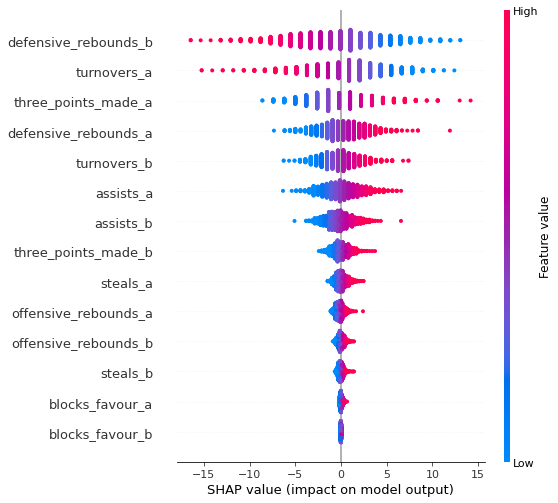

In [36]:

# Summary plot for points_a
shap.summary_plot(shap_values_points_a, X_test, show=False)



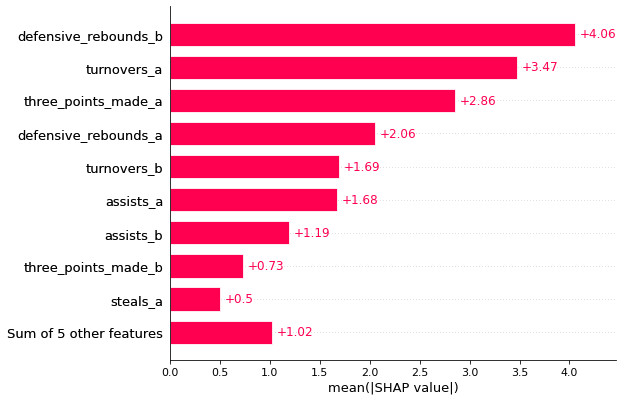

In [37]:
shap.plots.bar(shap_values_points_a)

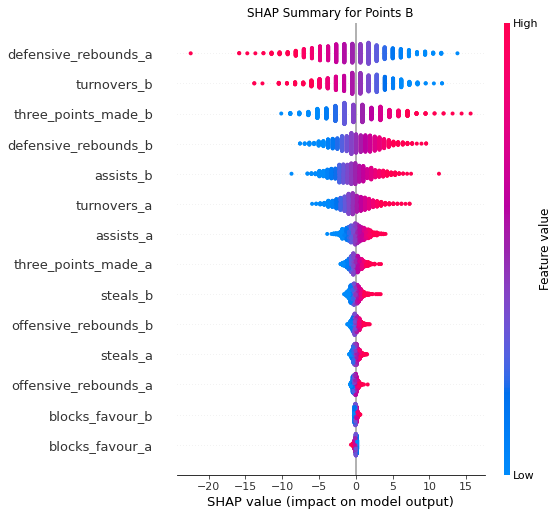

In [38]:

# Summary plot for points_b
shap.summary_plot(shap_values_points_b, X_test, show=False)
plt.title("SHAP Summary for Points B")
plt.show()

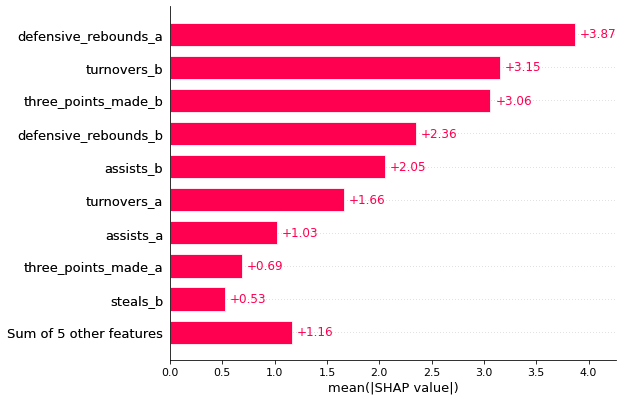

In [39]:
shap.plots.bar(shap_values_points_b)

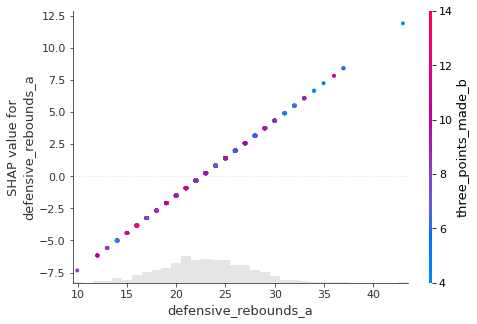

In [40]:
# SHAP scatter plot for 'defensive_rebounds_a' (target: points_a)
shap.plots.scatter(shap_values_points_a[:, 'defensive_rebounds_a'], color=shap_values_points_a[:, 'three_points_made_b'])

# LOCAL EXPLAINABILITY

In [41]:
# Get the first sample of X_test (the first game)
sample_X = X_test.iloc[-1:]  # First row, as we want to explain the first prediction

# SHAP Explainer for points_a (target)
shap_values_points_a_sample = explainer_points_a(sample_X)

# SHAP Explainer for points_b (target)
shap_values_points_b_sample = explainer_points_b(sample_X)

# Print the shape of SHAP values for the sample
print(f"SHAP values shape for points_a: {np.array(shap_values_points_a_sample.values).shape}")
print(f"SHAP values shape for points_b: {np.array(shap_values_points_b_sample.values).shape}")


SHAP values shape for points_a: (1, 14)
SHAP values shape for points_b: (1, 14)


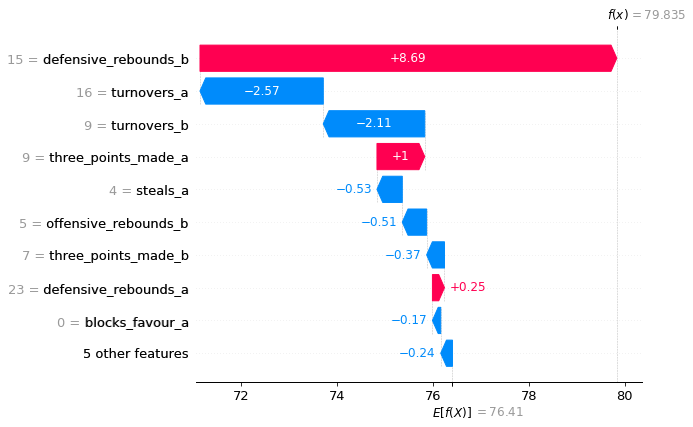

In [42]:
# Waterfall plot for points_a (target)
shap.plots.waterfall(shap_values_points_a_sample[0]) 

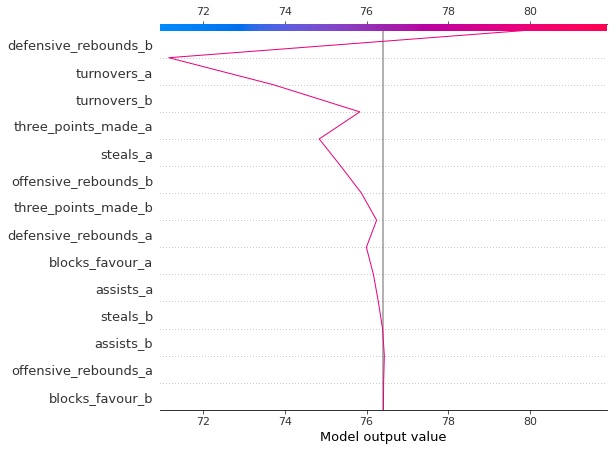

In [43]:
# Decision plot for points_a (target)
shap.decision_plot(explainer_points_a.expected_value, shap_values_points_a_sample.values[0], feature_names=list(X_test.columns), show=True)

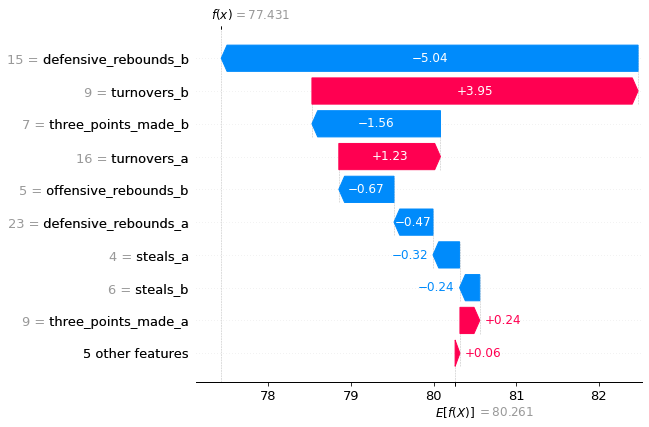

In [44]:
# Waterfall plot for points_b (target)
shap.plots.waterfall(shap_values_points_b_sample[0])

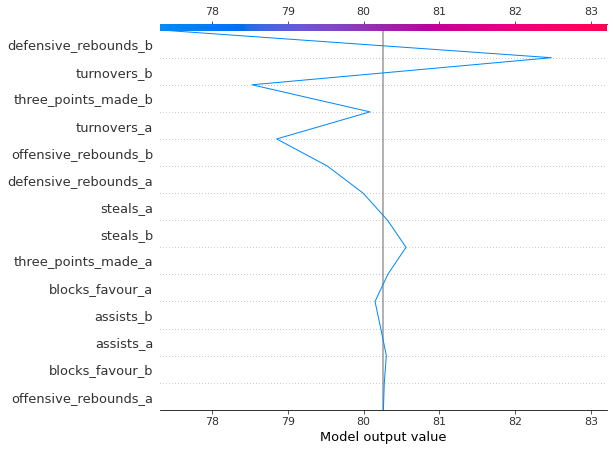

In [45]:
# Decision plot for points_b (target)
shap.decision_plot(explainer_points_b.expected_value, shap_values_points_b_sample.values[0], feature_names=list(X_test.columns), show=True)

# GLOBAL EXPLAINABILITY SIMPLE LOGISTIC MODEL

In [47]:
# SHAP Explainer for Logistic Regression model
explainer = shap.Explainer(logistic_model, X_train_all)
shap_values = explainer(X_test_all)

# Print the shape of SHAP values
print(f"SHAP values shape: {np.array(shap_values.values).shape}")


SHAP values shape: (1594, 14)


In [48]:
# Get the probabilities for class 1 (team A wins)
predicted_probabilities = logistic_model.predict_proba(X_test_all)[:, 1]

# Compute the average prediction
average_prediction = np.mean(predicted_probabilities)

print(f"Average prediction (probability of Team A winning): {average_prediction:.4f}")


Average prediction (probability of Team A winning): 0.3657


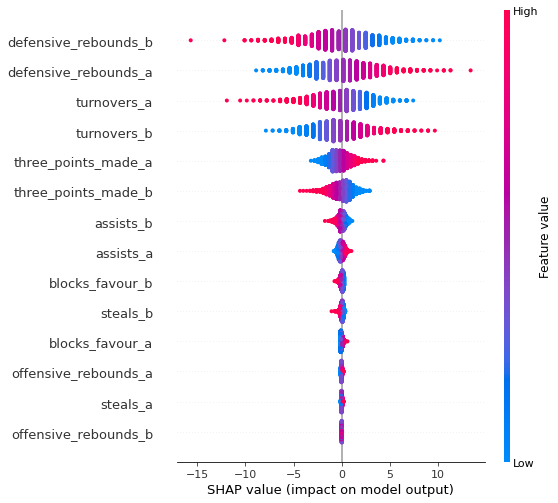

In [49]:
shap.summary_plot(shap_values, X_test_all, show=False)


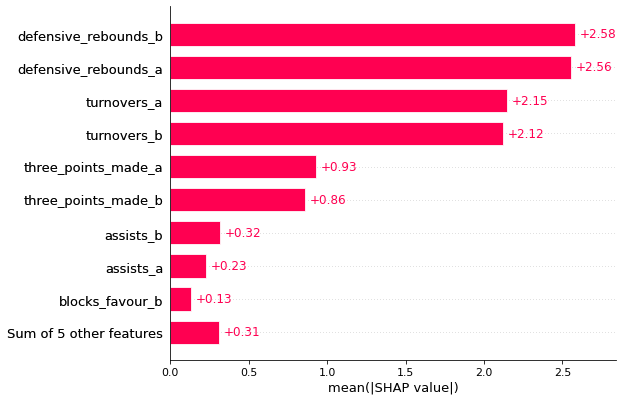

In [50]:
shap.plots.bar(shap_values)

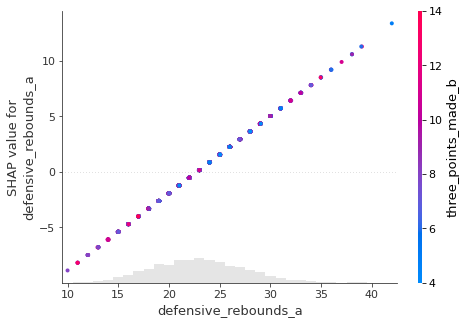

In [51]:
shap.plots.scatter(shap_values[:, 'defensive_rebounds_a'], color=shap_values[:, 'three_points_made_b'])

# LOCAL

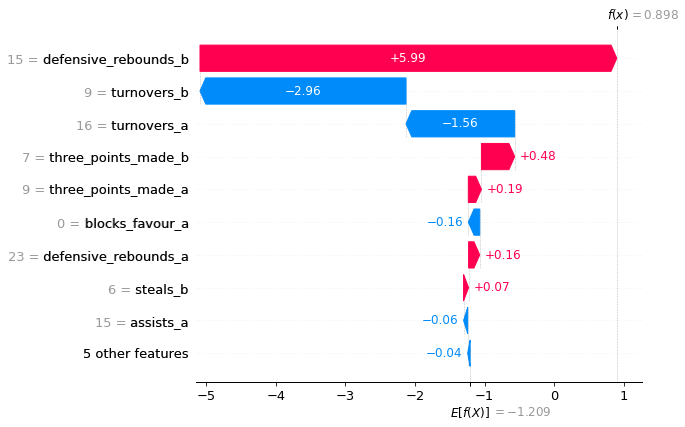

In [53]:
# Select the last sample from X_test
sample_X = X_test.iloc[-1:]

# Compute SHAP values for the first sample
shap_values_sample = explainer(sample_X)

# Waterfall plot for the first sample
shap.plots.waterfall(shap_values_sample[0])


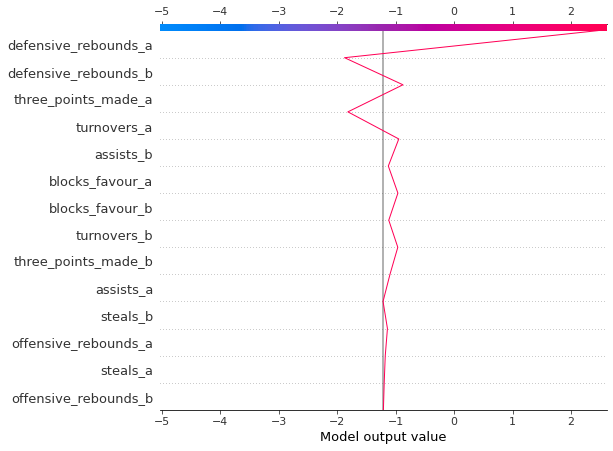

In [54]:
shap.decision_plot(explainer.expected_value, shap_values.values[0], feature_names=list(X_test_all.columns), show=True)

# SAVING MODELS PICKLE

In [ ]:
import pickle

# Save Logistic Regression model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)

# Save Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [ ]:

with open('linear_regressor_points.pkl', 'wb') as f:
    pickle.dump(linear_regressor, f)


with open('gradient_boosting_points.pkl', 'wb') as f:
    pickle.dump(gb_regressor, f)


with open('svr_regressor_points.pkl', 'wb') as f:
    pickle.dump(svr_regressor, f)

